# Exploratory Analysis

We now start with exploratory data analysis after data cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import json as js
import os as os
import matplotlib.pyplot as plt

In [2]:
data_json = pd.read_json("../data/train.json")
data_json

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


<Axes: >

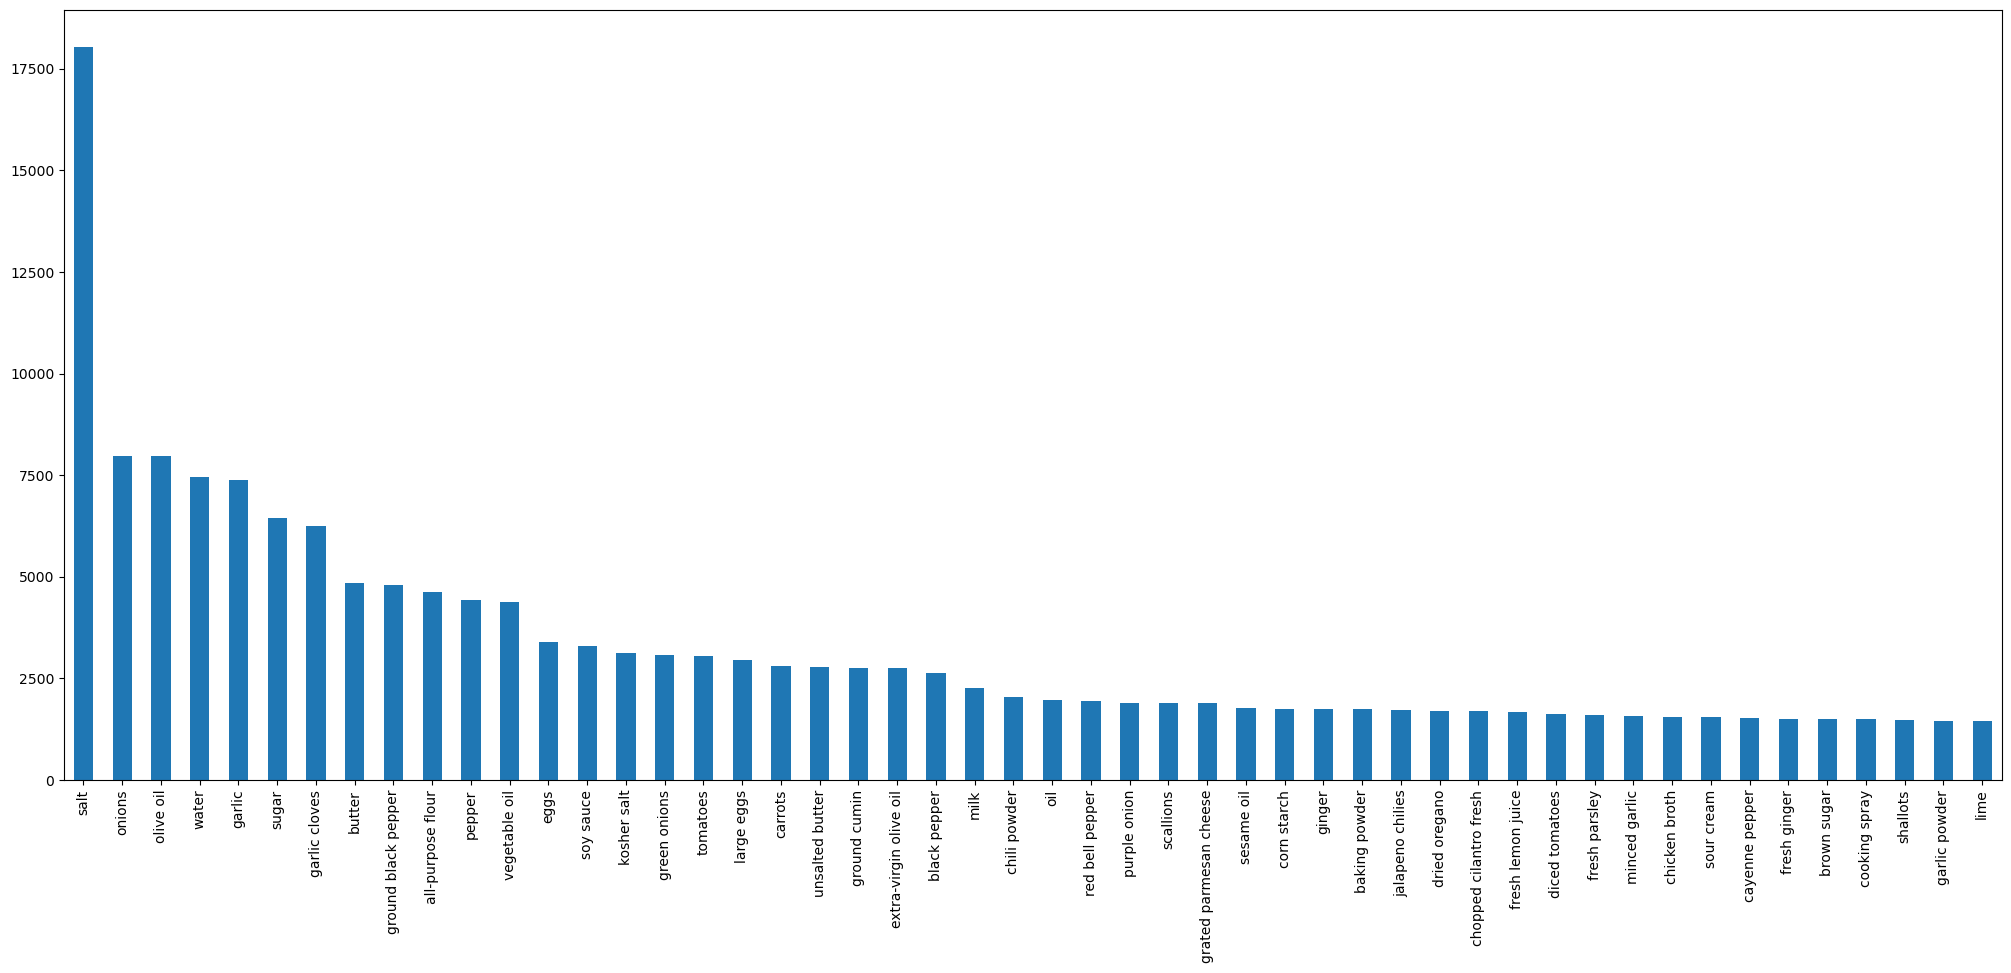

In [3]:
#we want to show the most commonly used ingredients among all the cuisines
fig, ax = plt.subplots(figsize=(25,10))
ingredients_count = []
for x in data_json['ingredients']:
    for y in x:
        ingredients_count.append(y)
        
ingredients_count = pd.Series(ingredients_count)
ingredients_count.value_counts().sort_values(ascending=False).head(50).plot.bar(ax = ax)

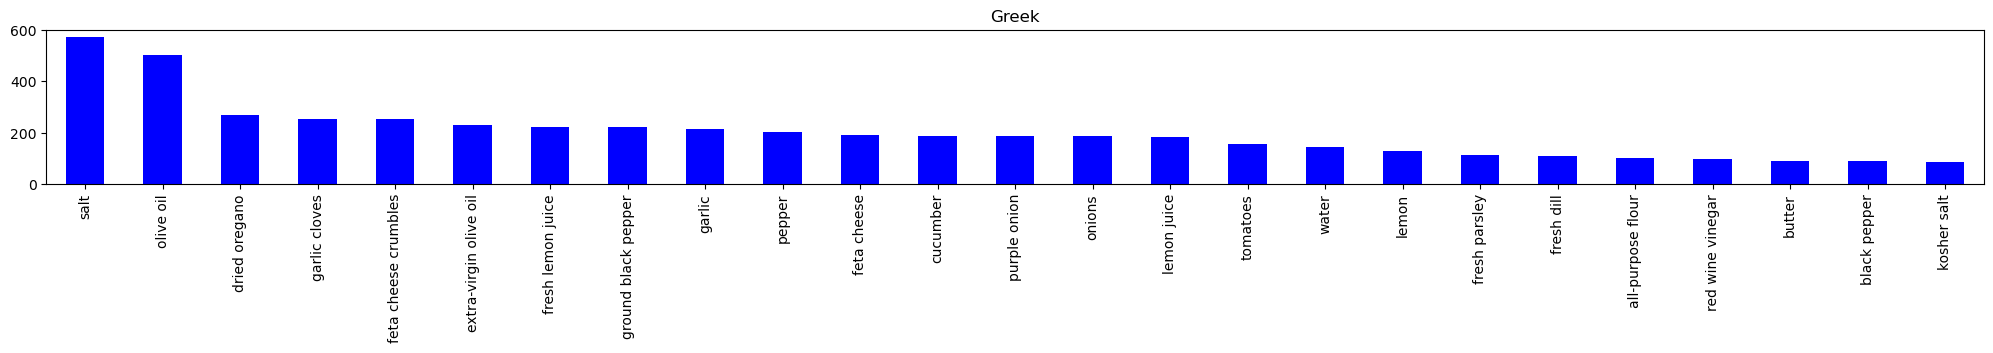

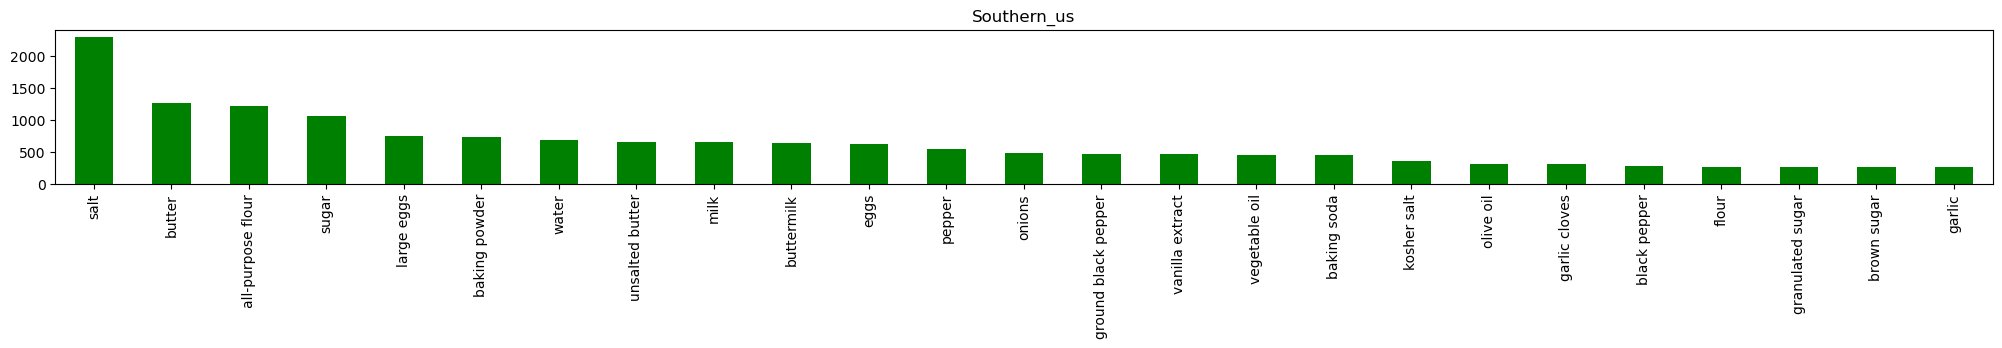

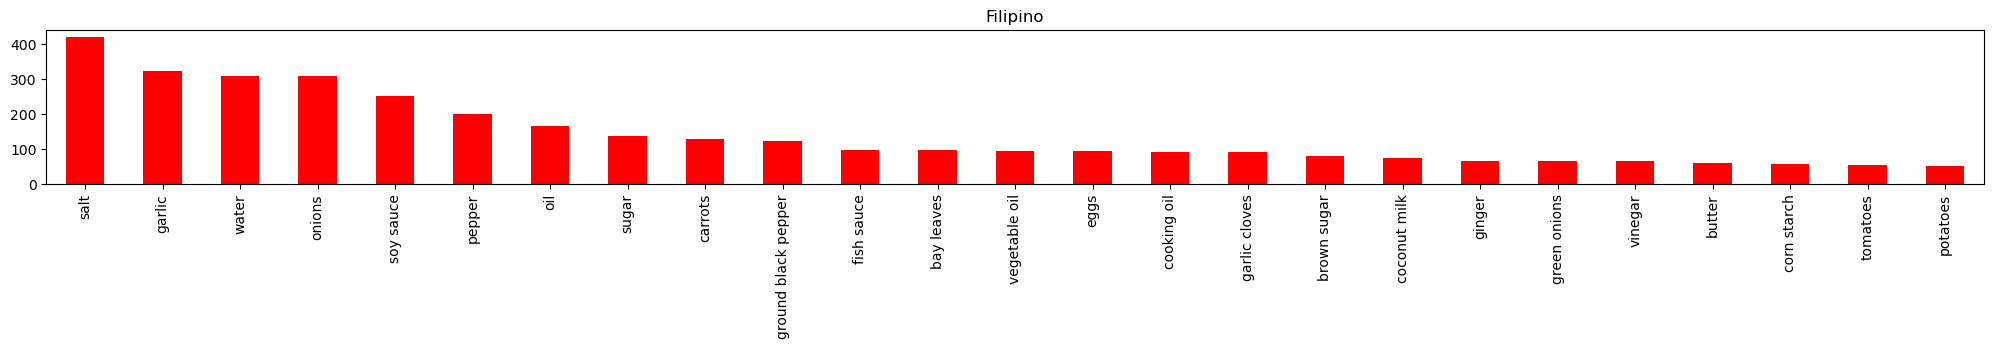

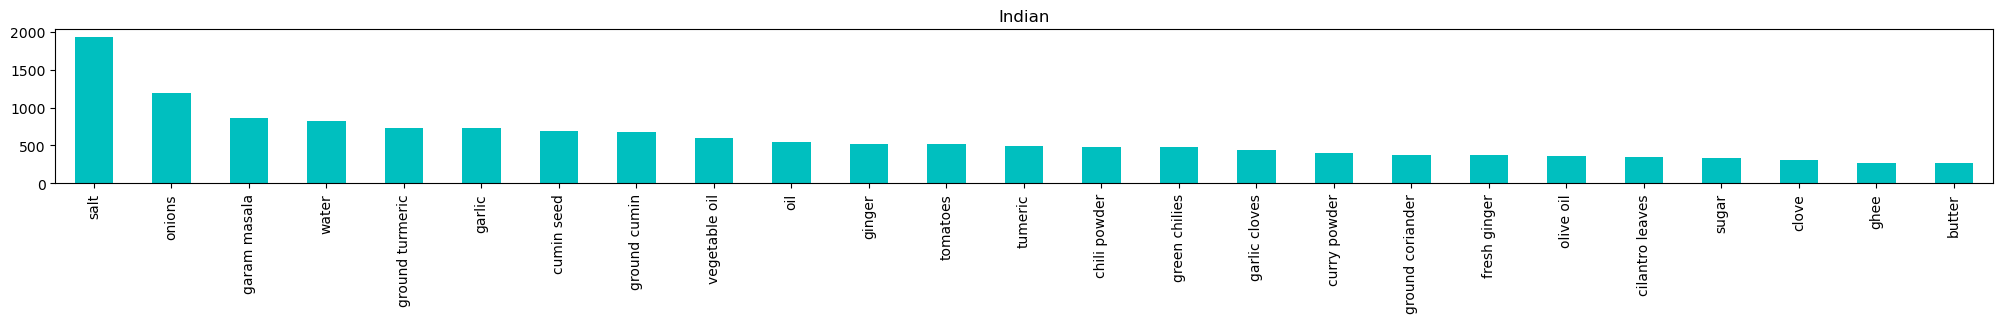

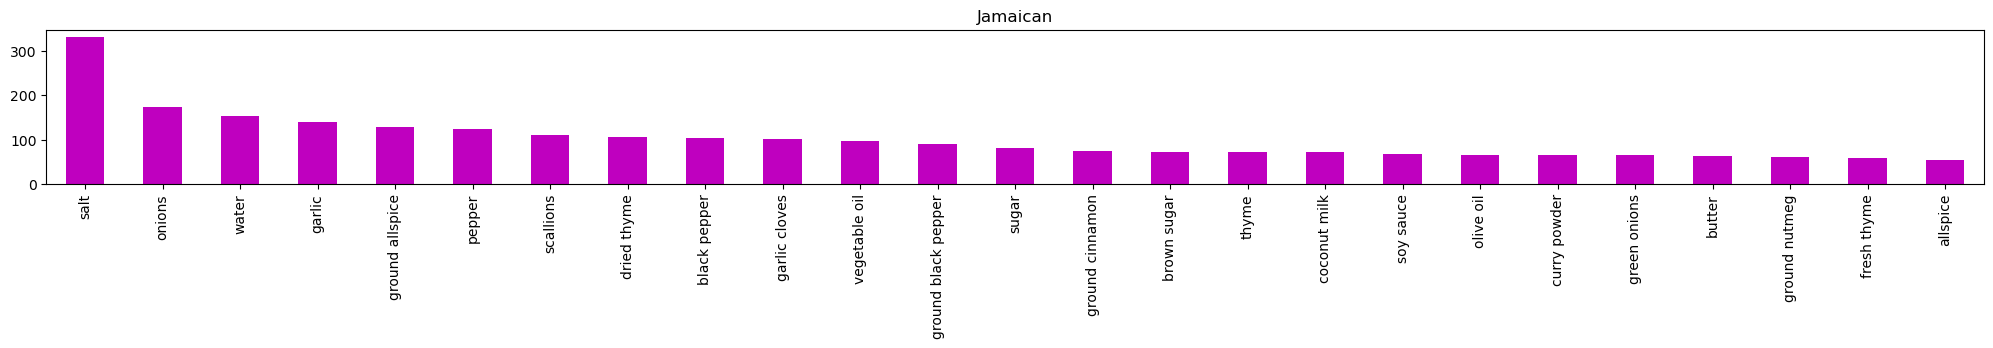

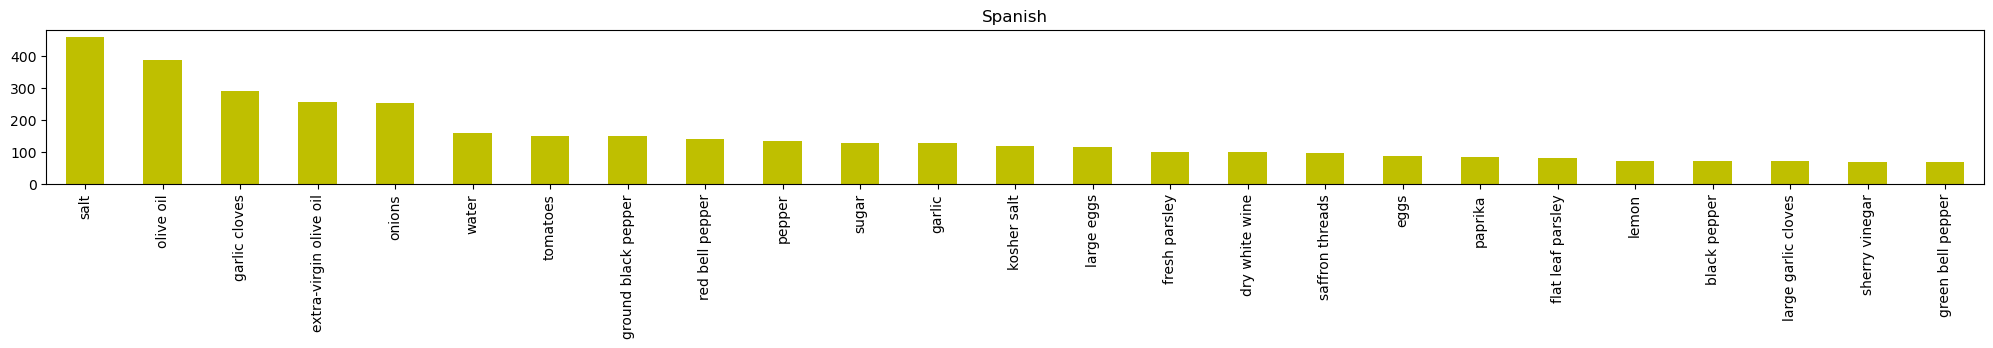

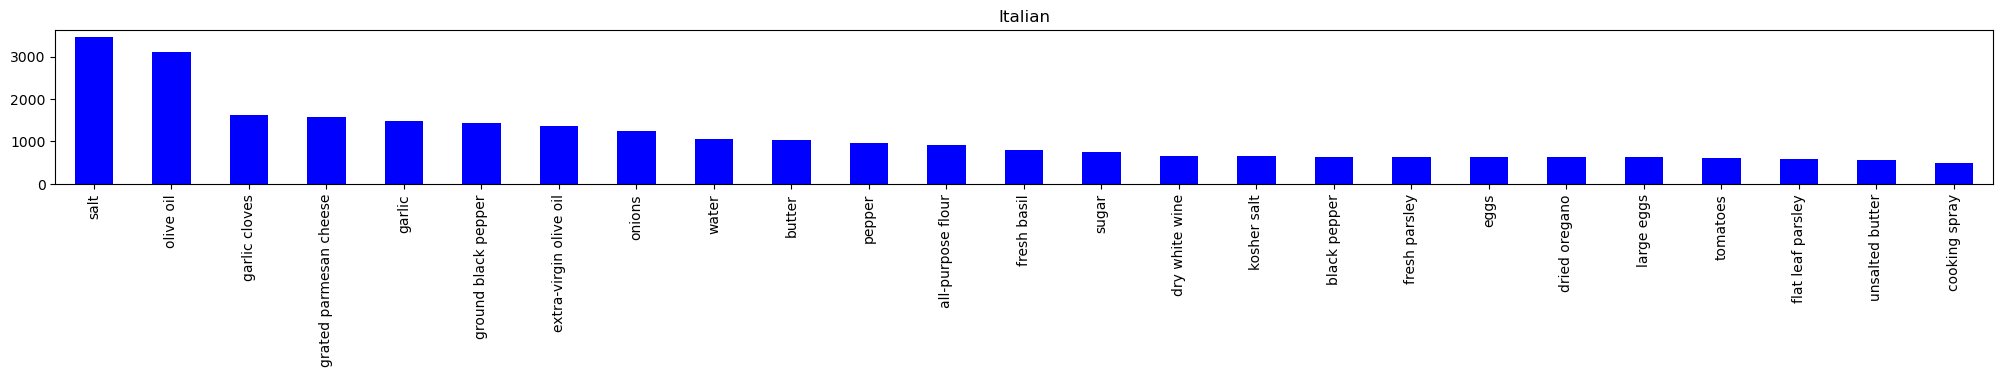

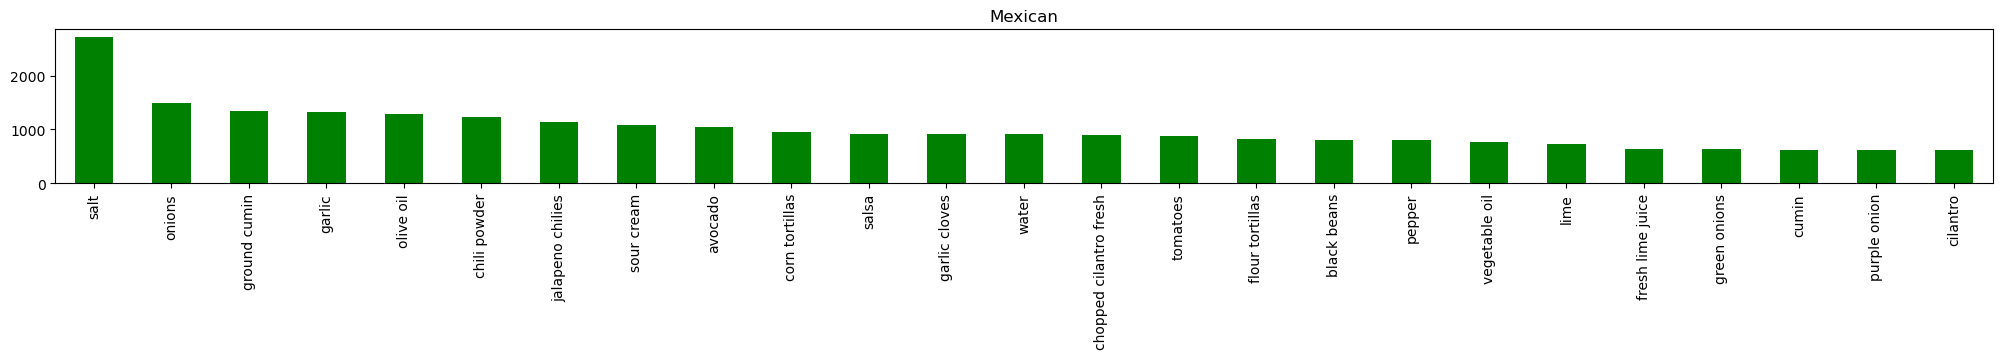

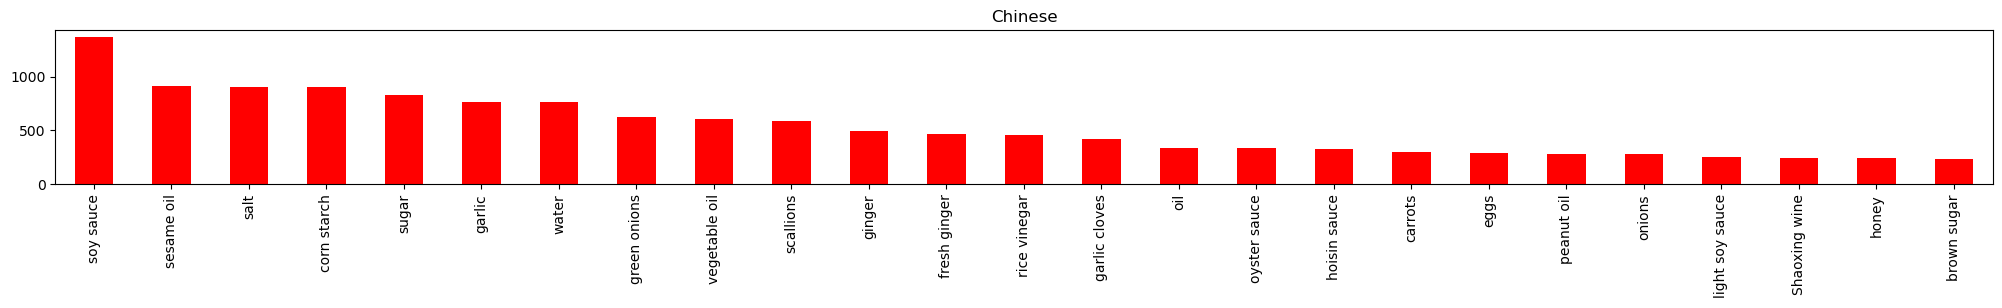

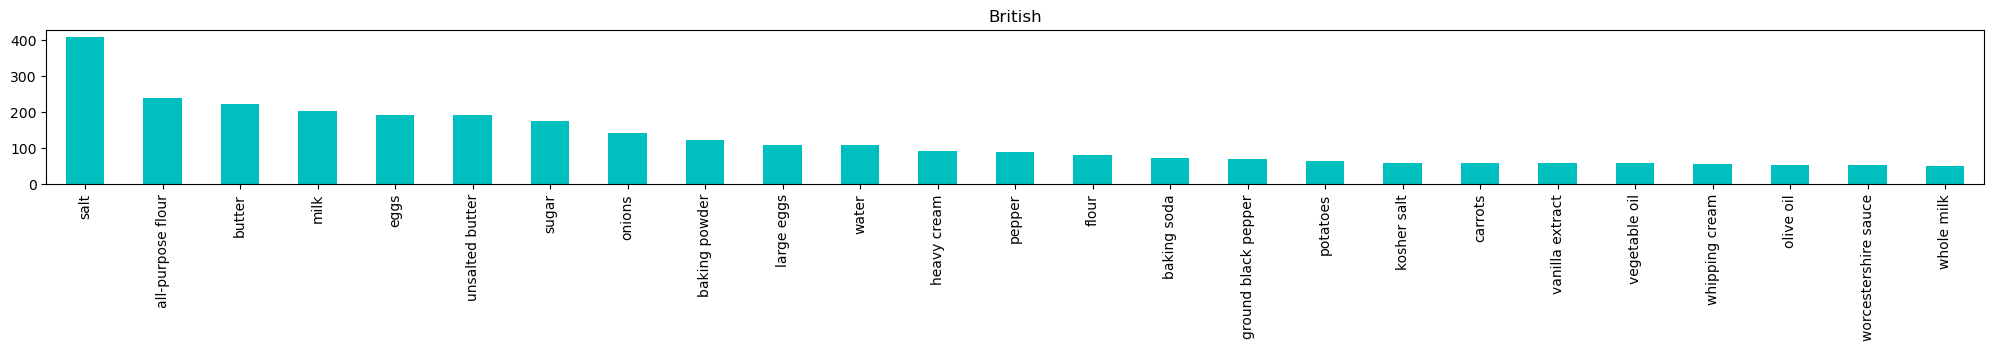

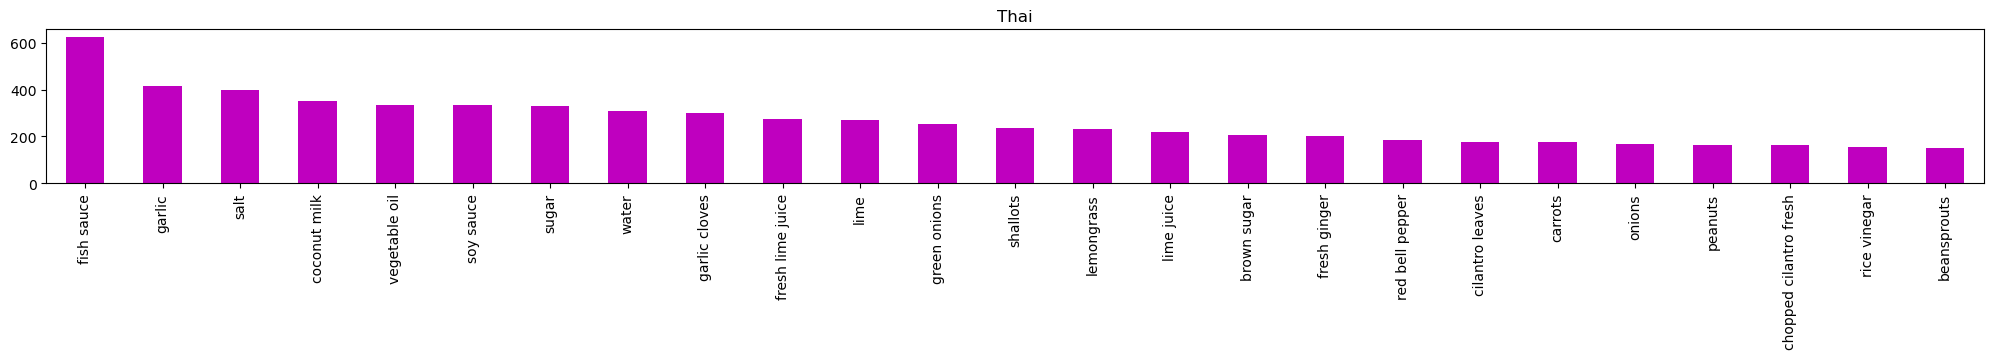

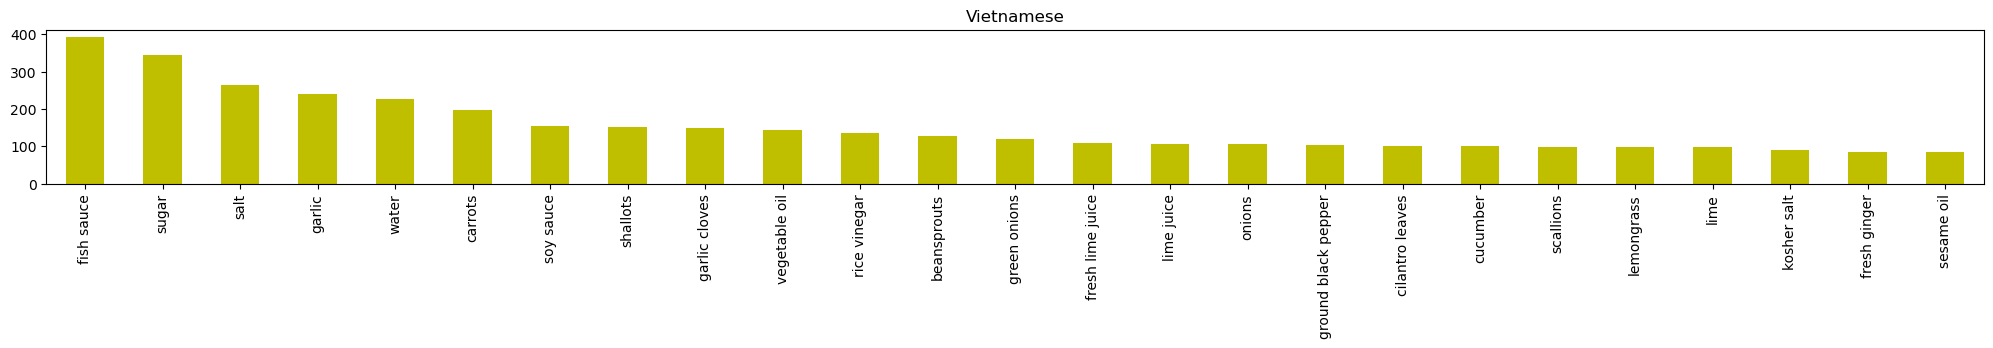

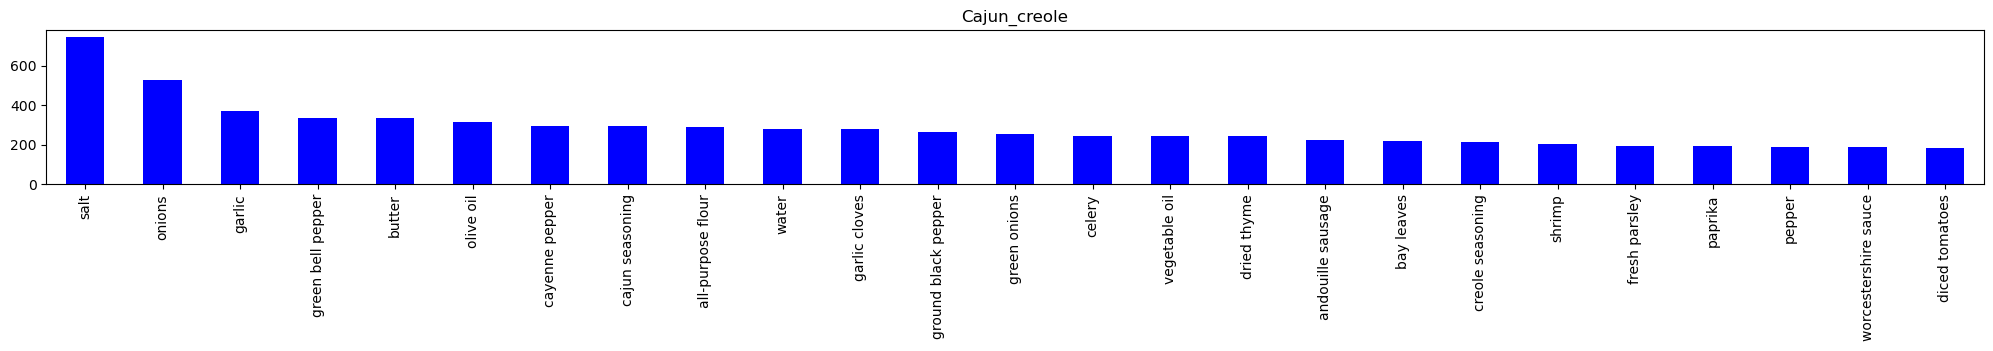

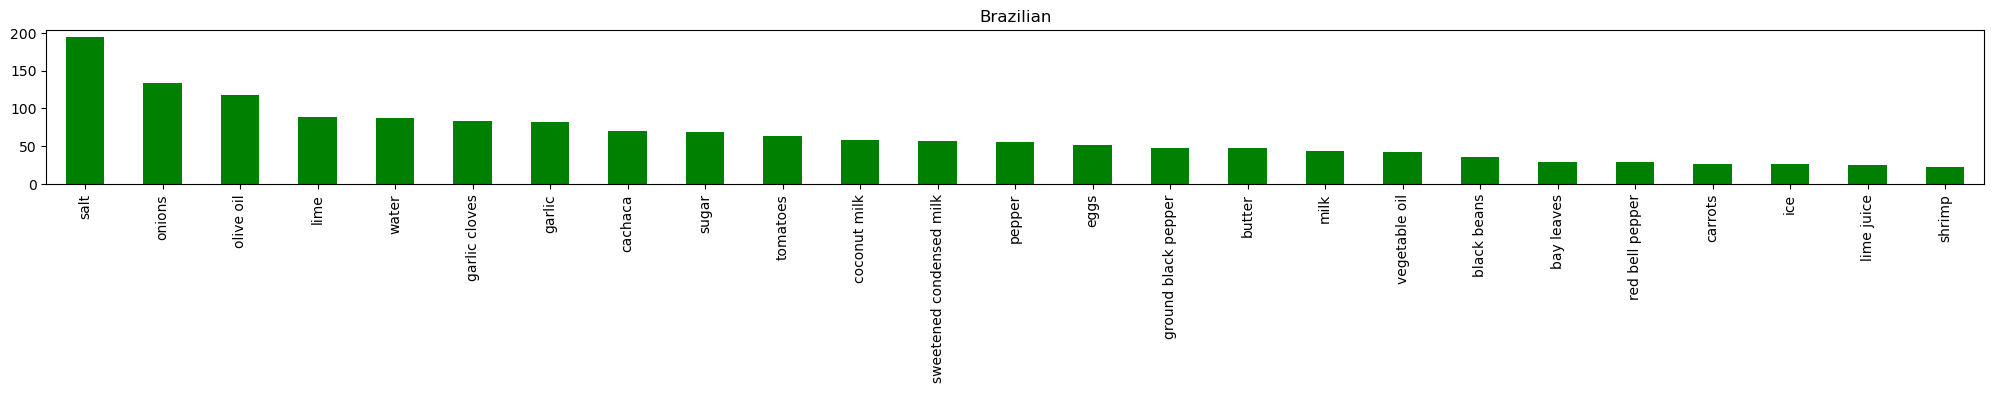

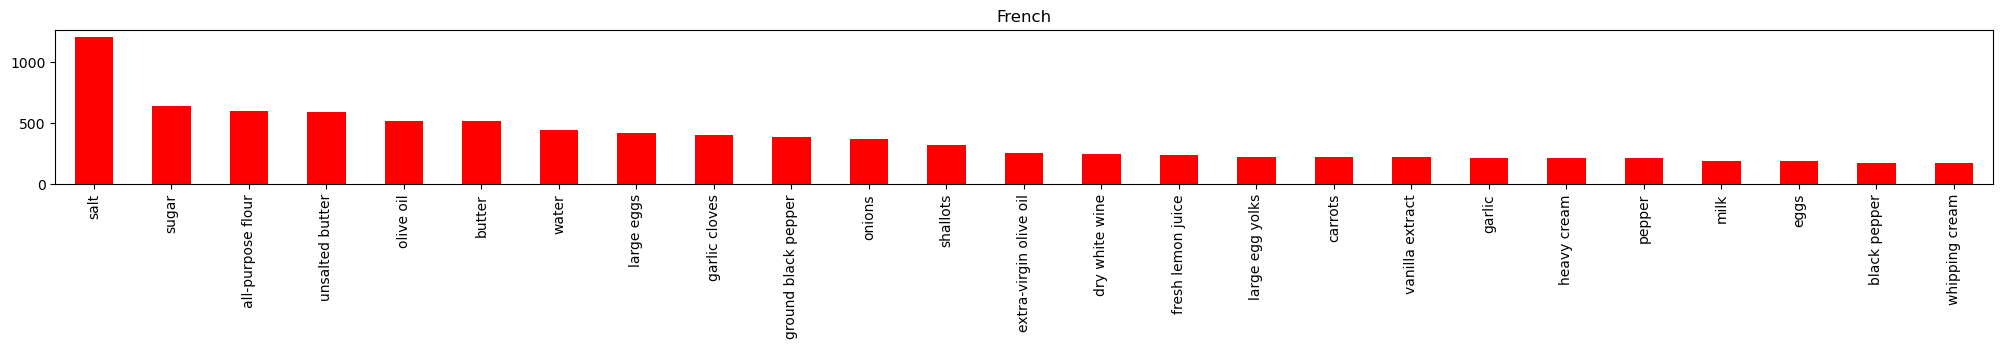

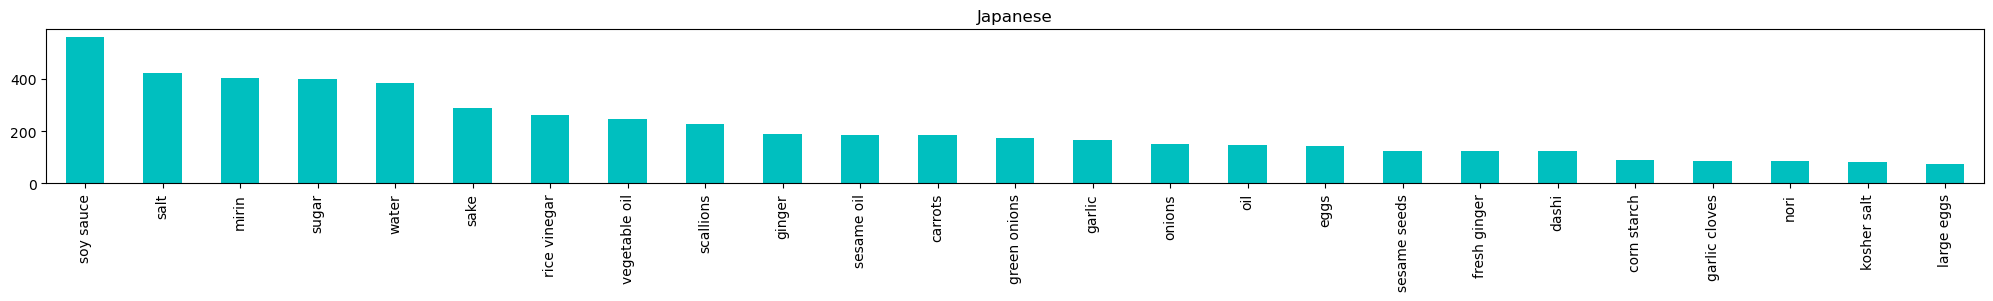

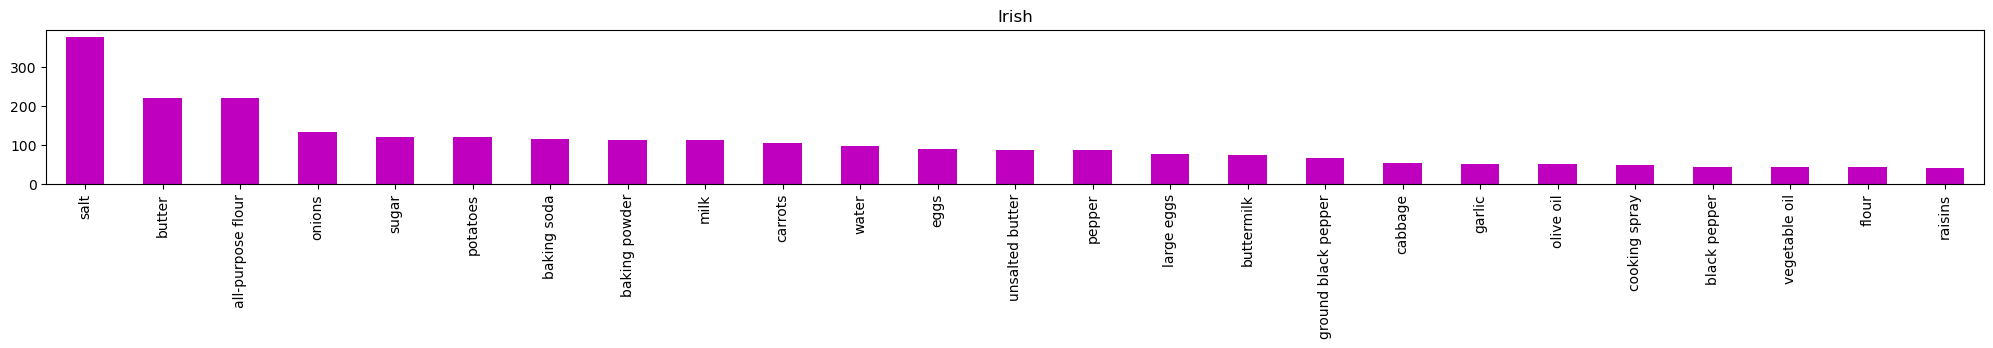

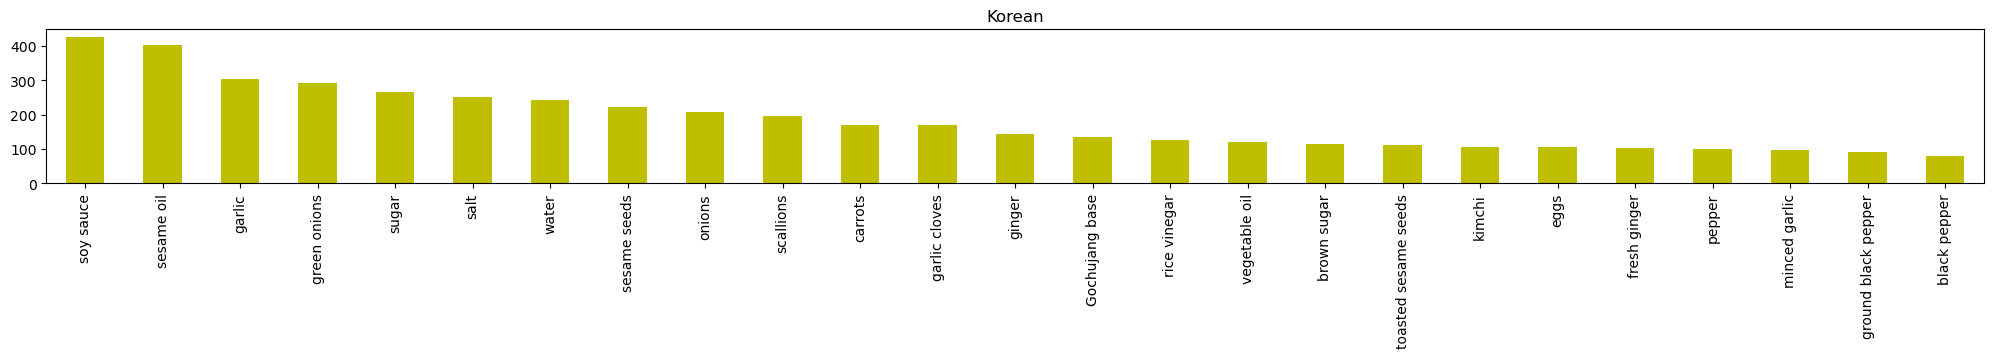

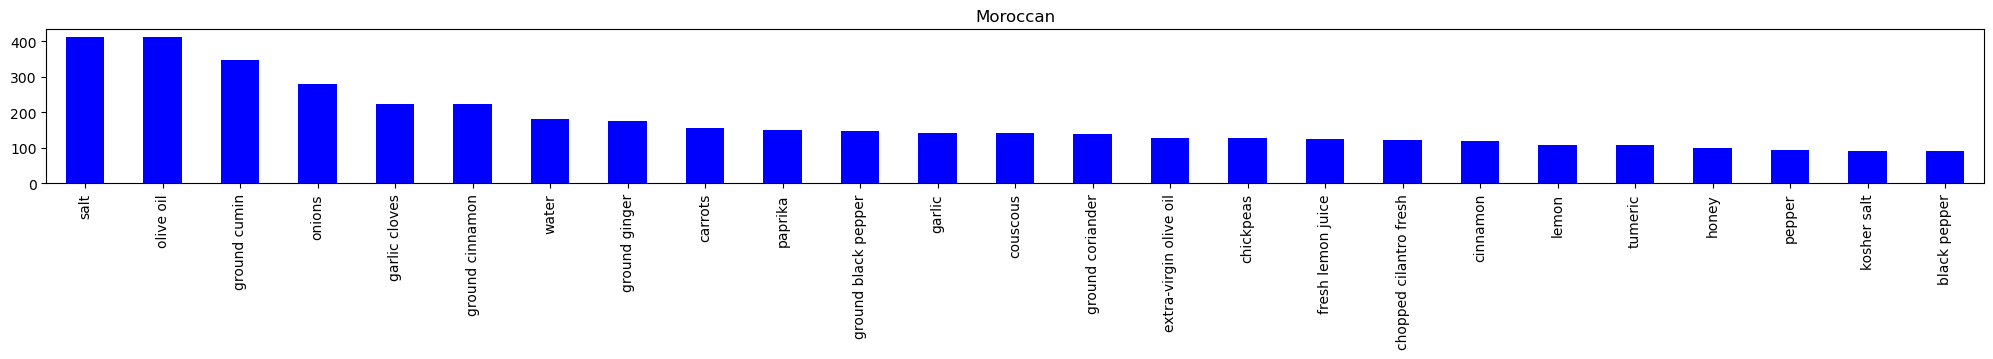

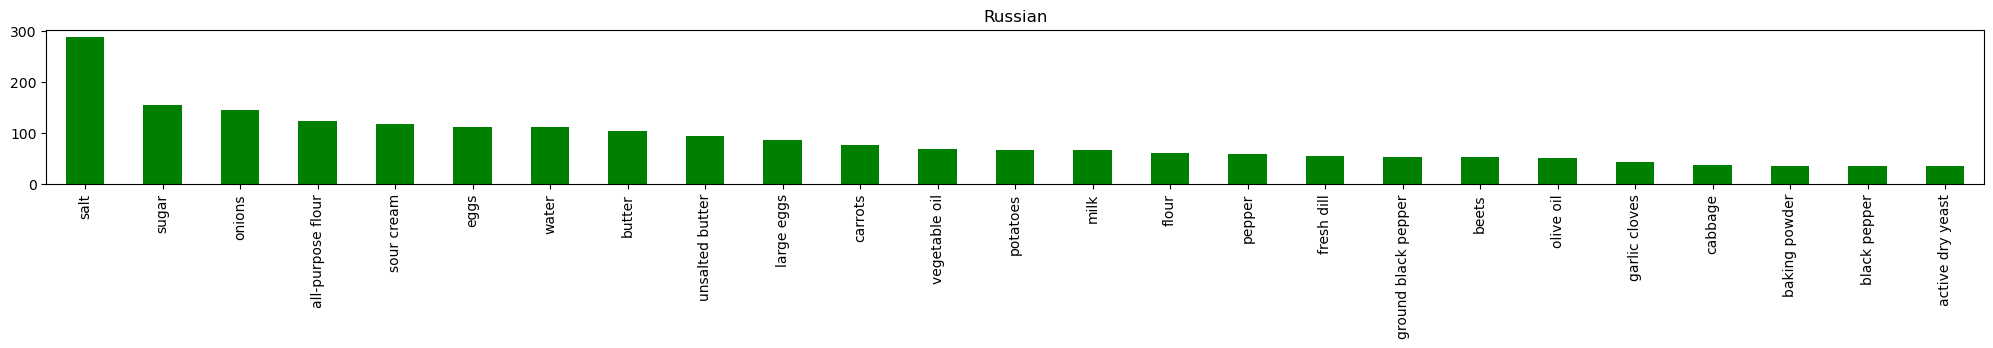

In [4]:
#now we plot the occurences of each ingredient in each cuisine, in descending order
cuisine= data_json['cuisine'].unique()
cuisine_dict = dict()
colors = ["b", "g", "r", "c", "m","y", "b", "g", "r", "c","m", "y", "b", "g", "r","c", "m", "y", "b", "g"]
count = 0
for x in cuisine: 
    i = []
    for ing_list in data_json[data_json['cuisine']==x]['ingredients']:
        for ing in ing_list:
            i.append(ing)
    cuisine_dict[x] = i
for key in cuisine_dict.keys():
    fig, ax = plt.subplots(figsize=(25,2))
    pd.Series(cuisine_dict[key]).value_counts().head(25).plot.bar(ax=ax, title=key.capitalize(), color = colors[count])
    count+=1
    plt.show()


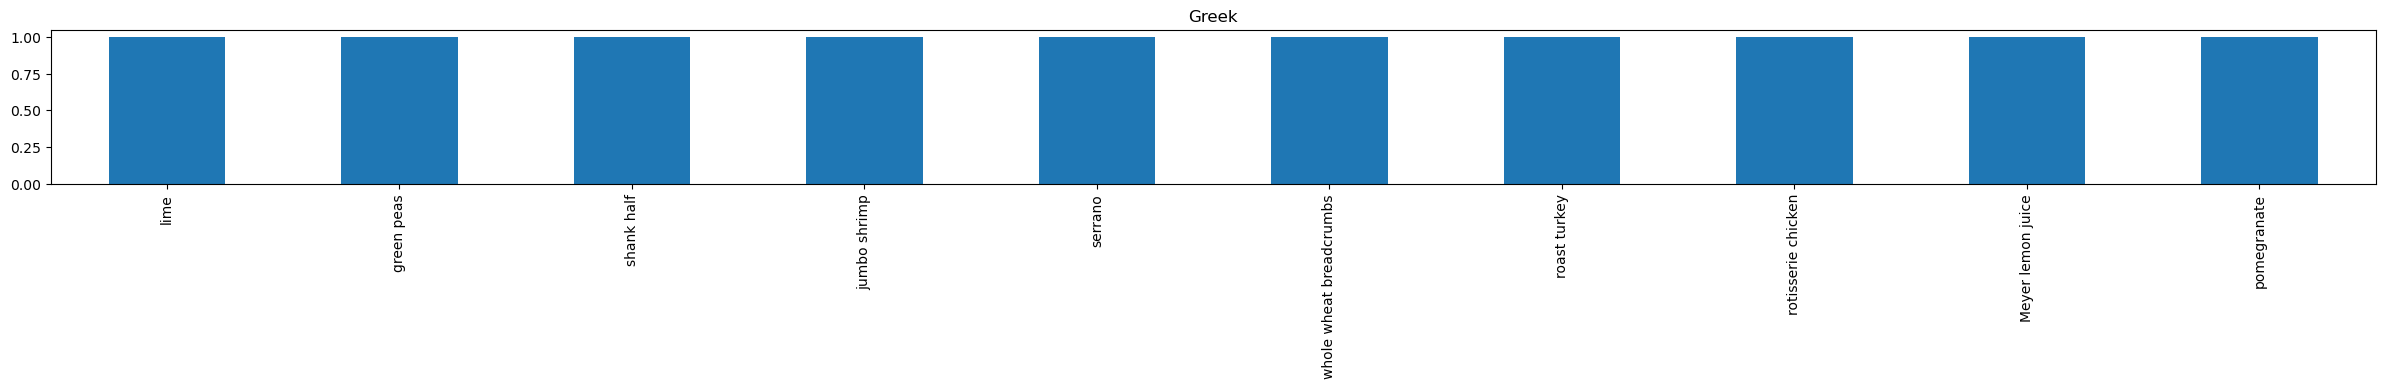

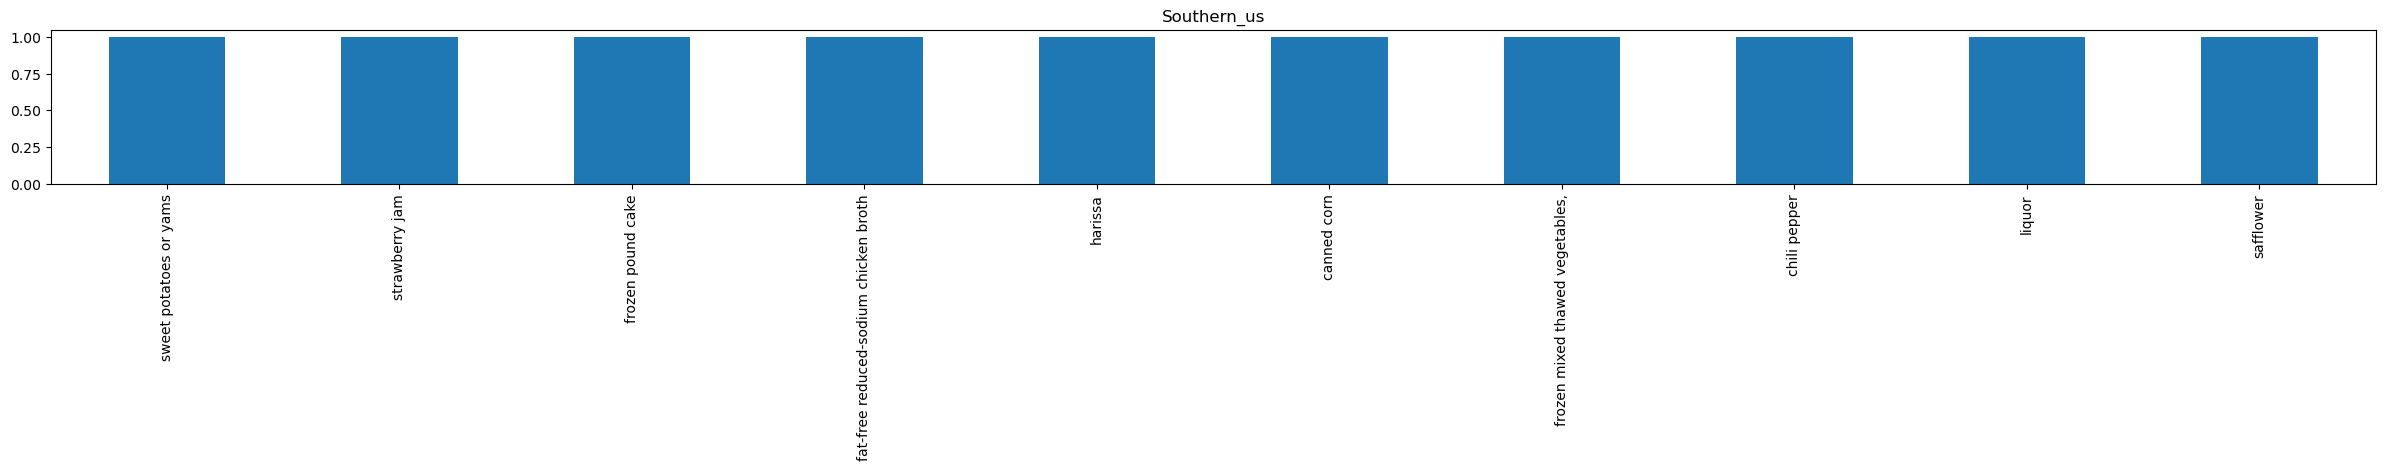

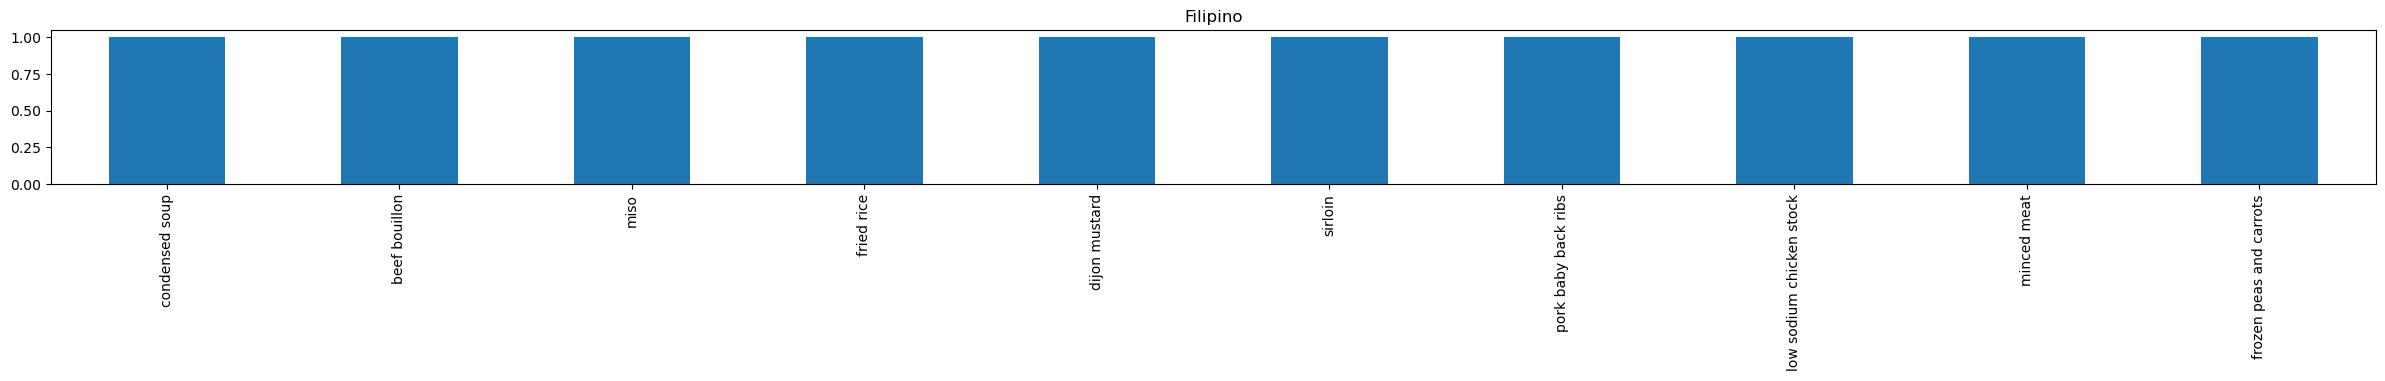

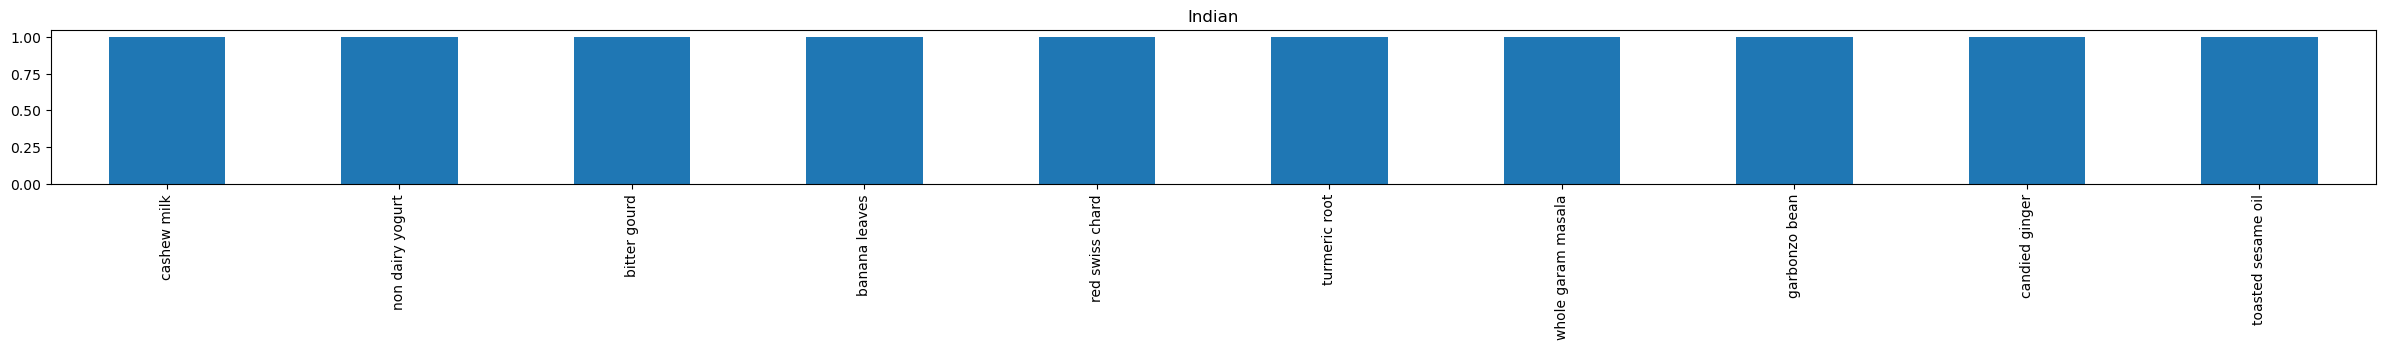

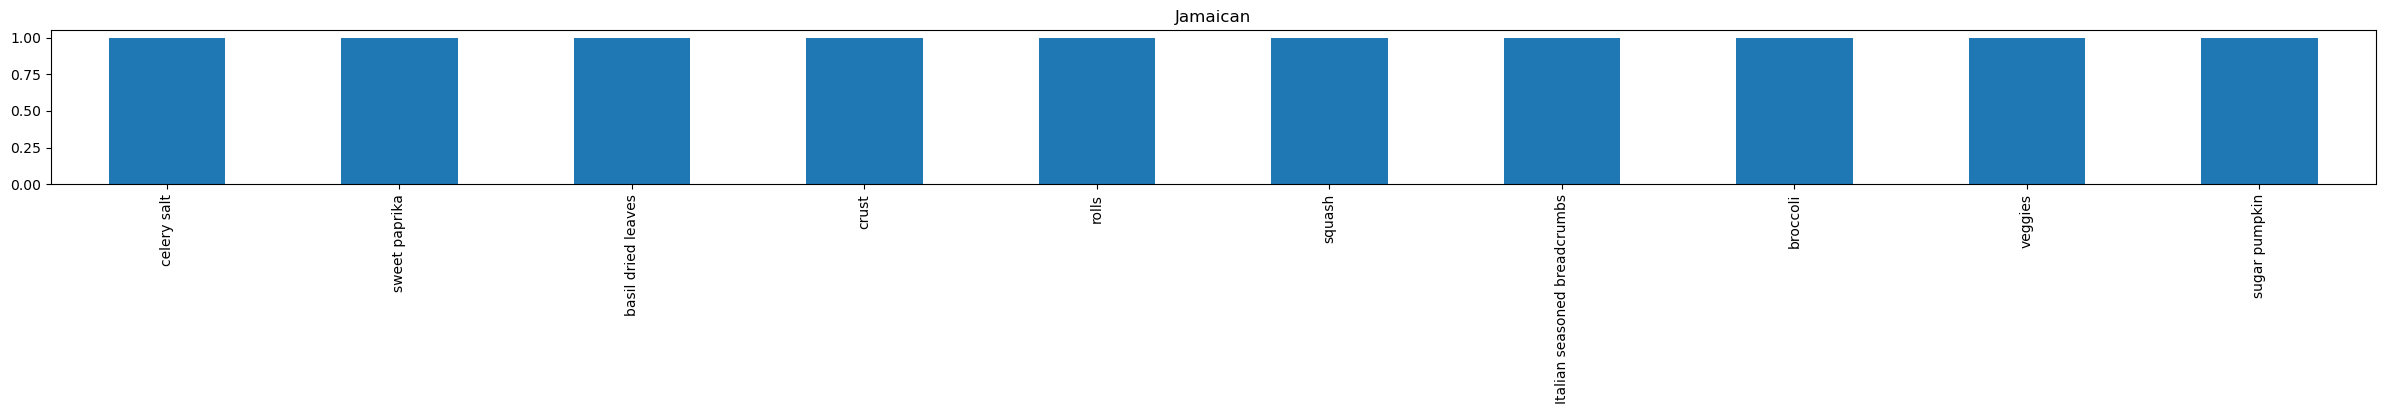

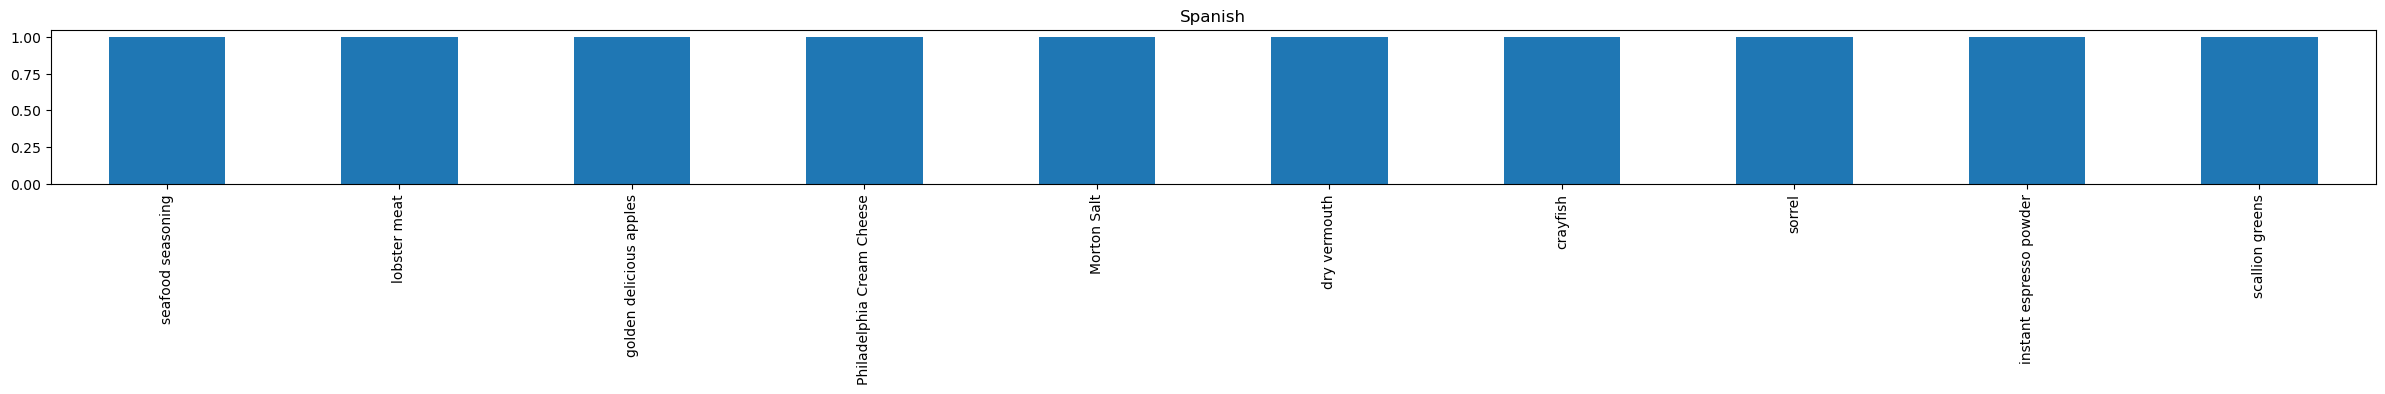

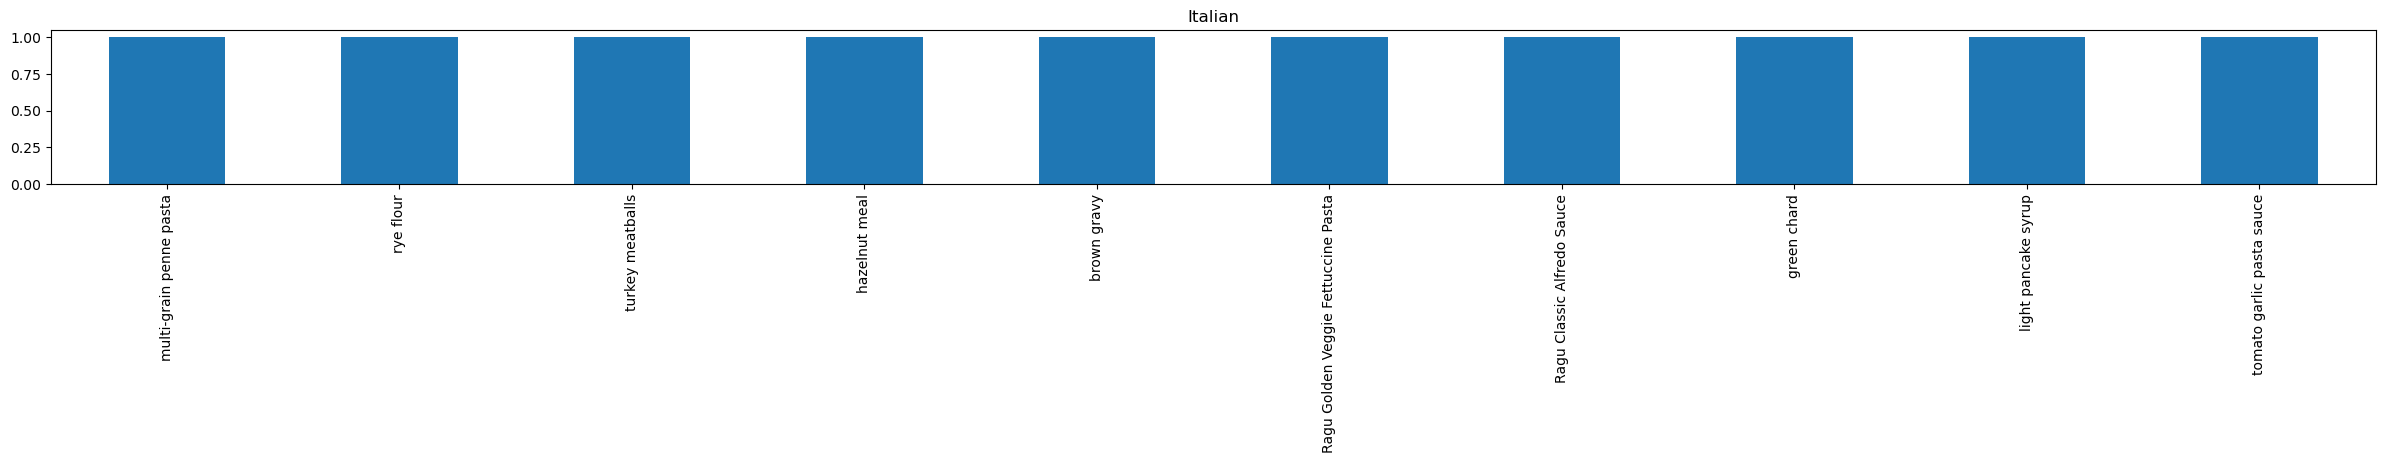

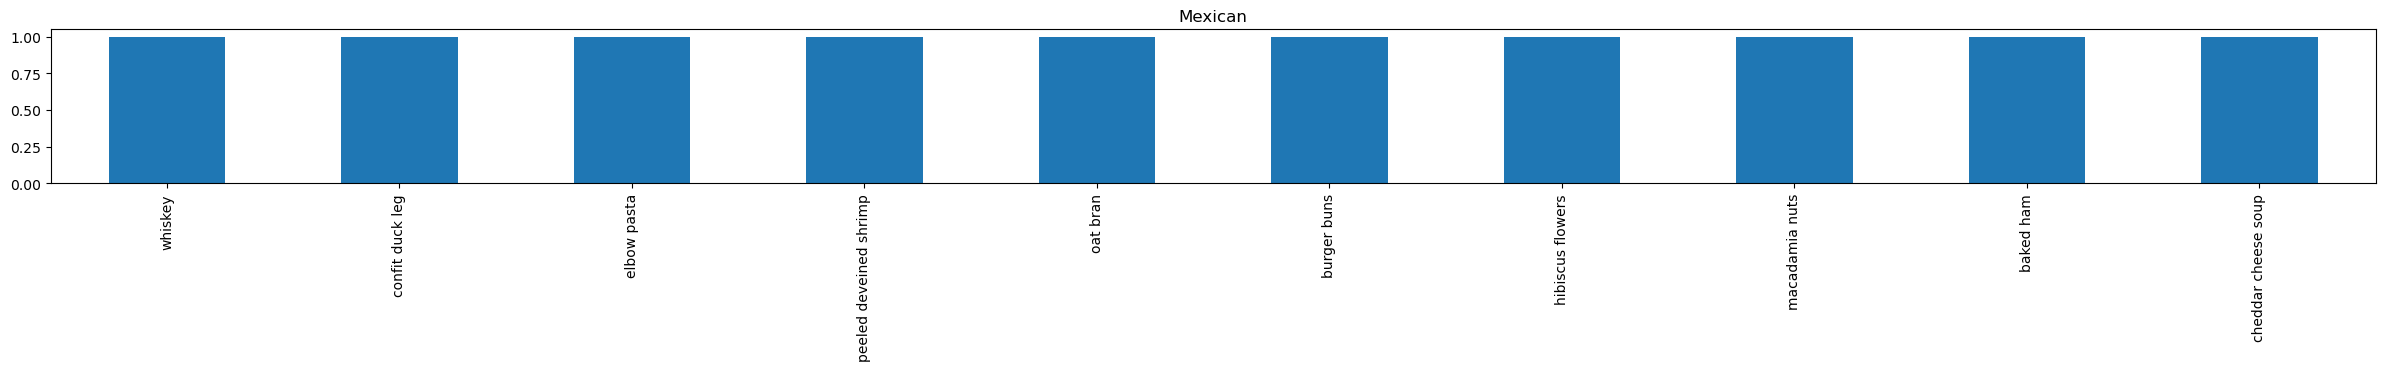

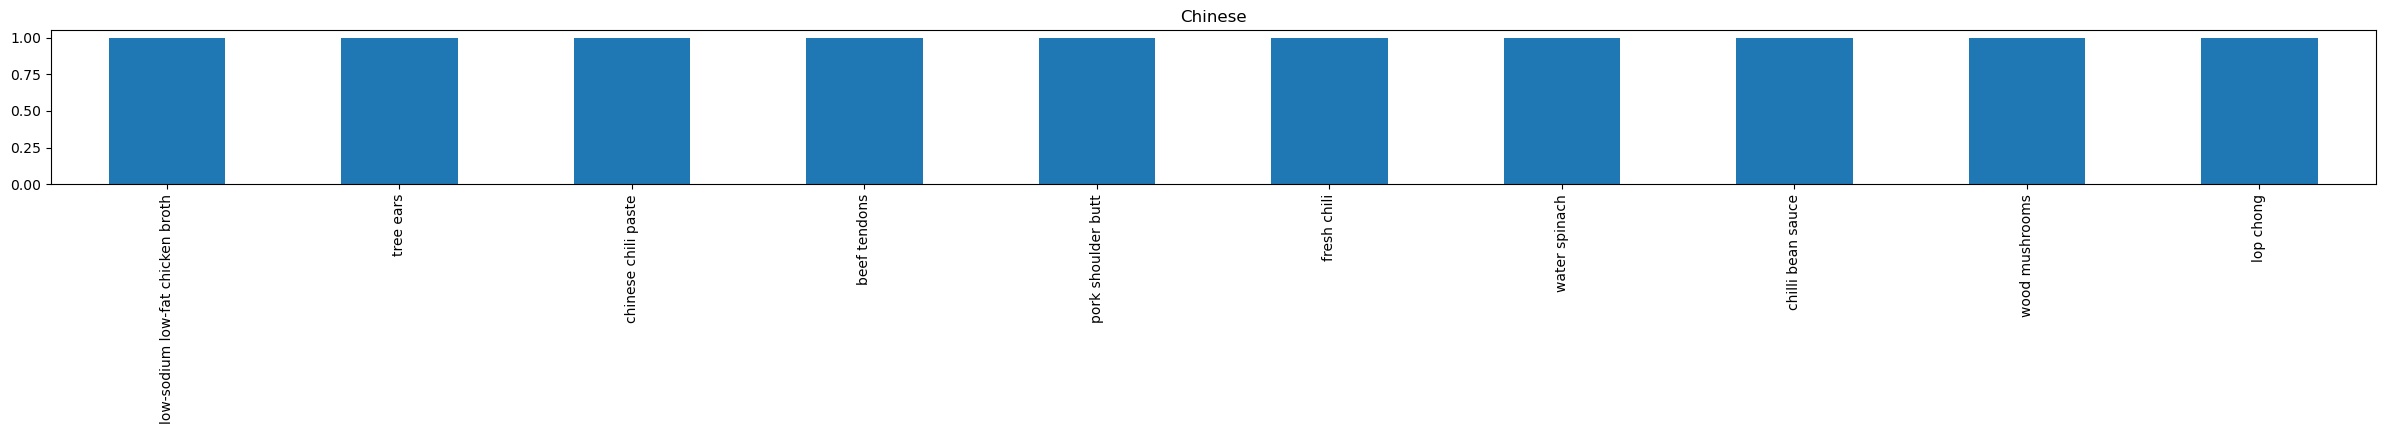

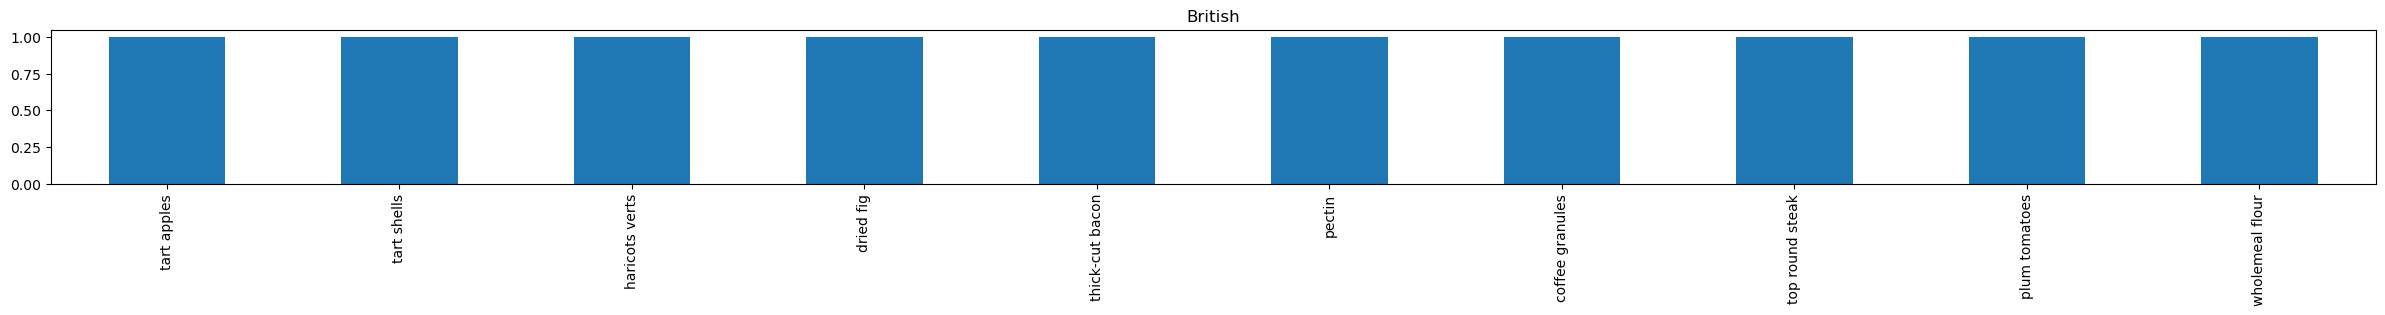

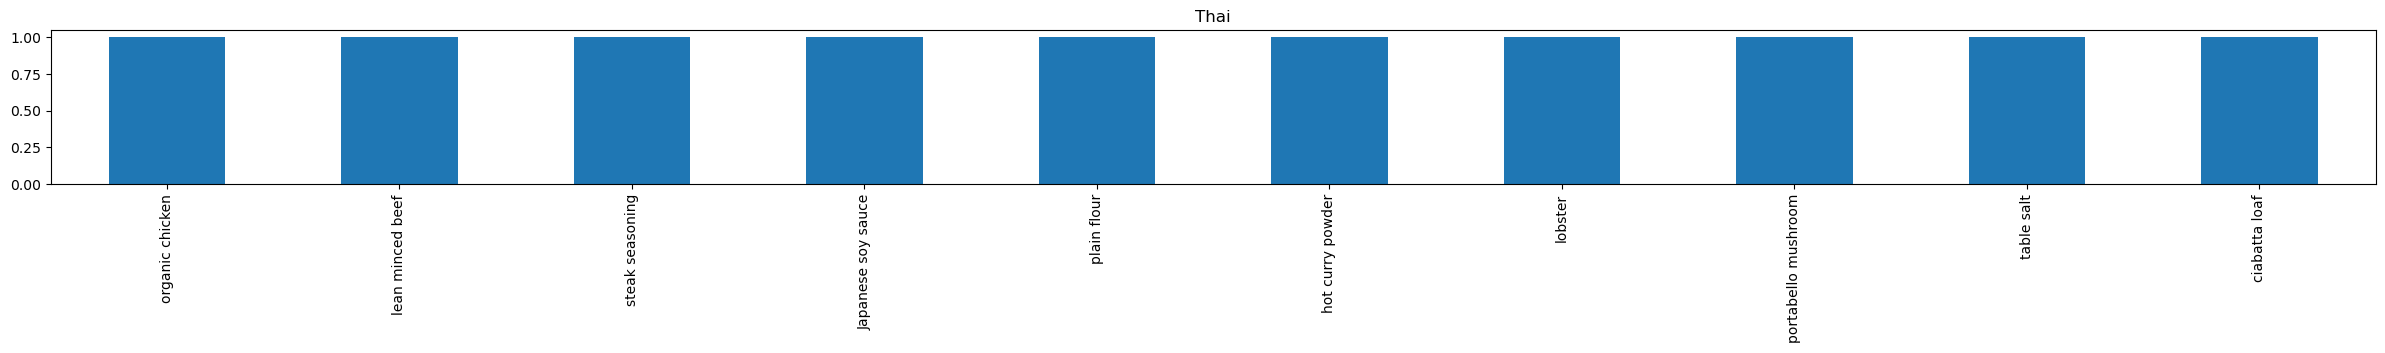

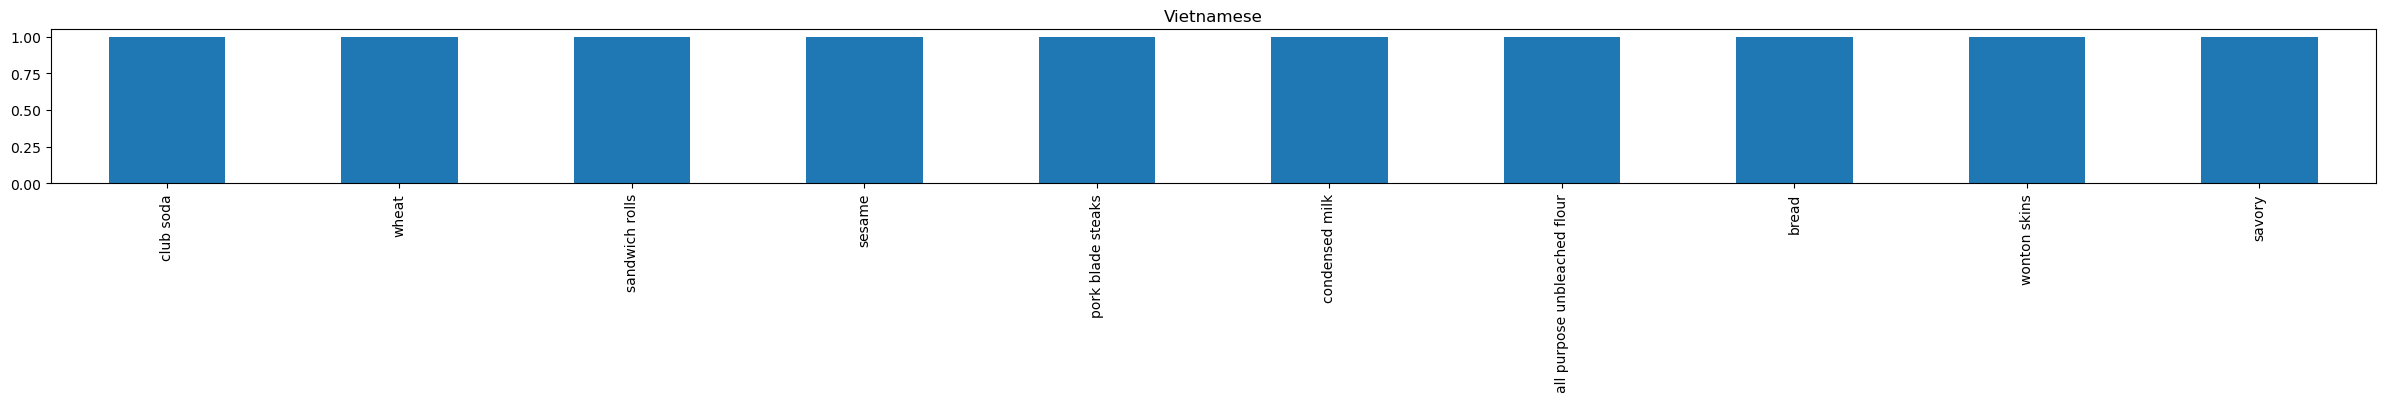

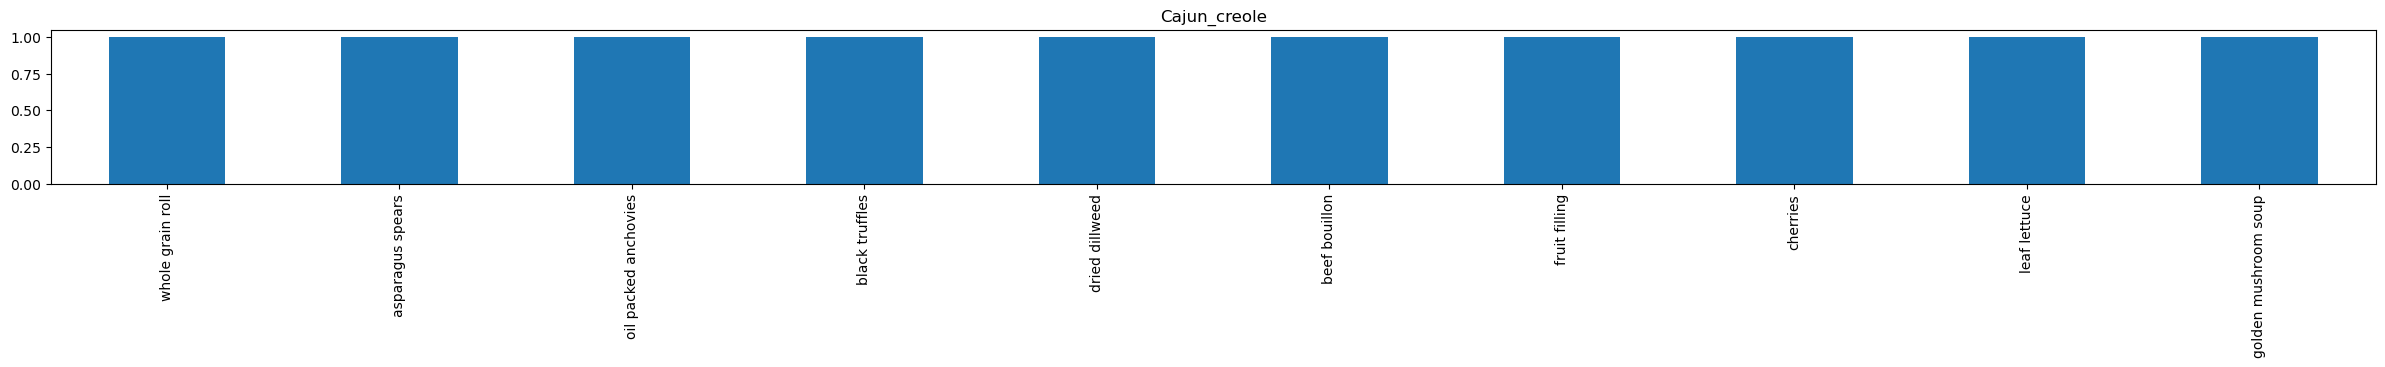

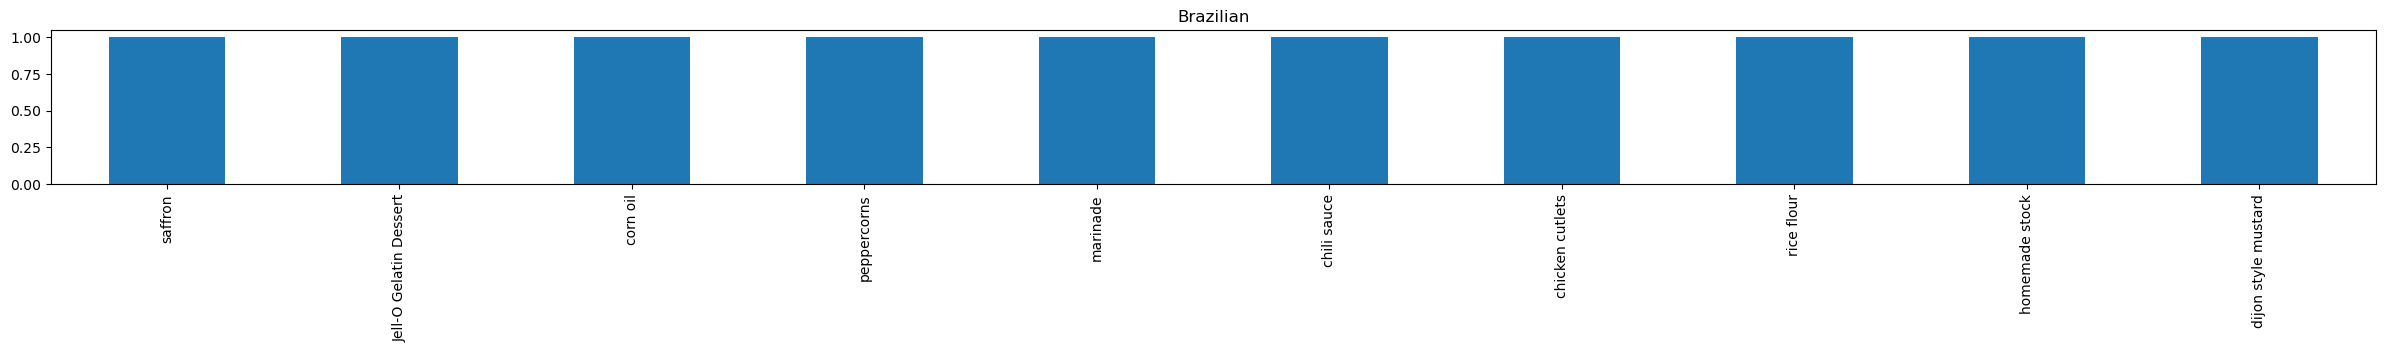

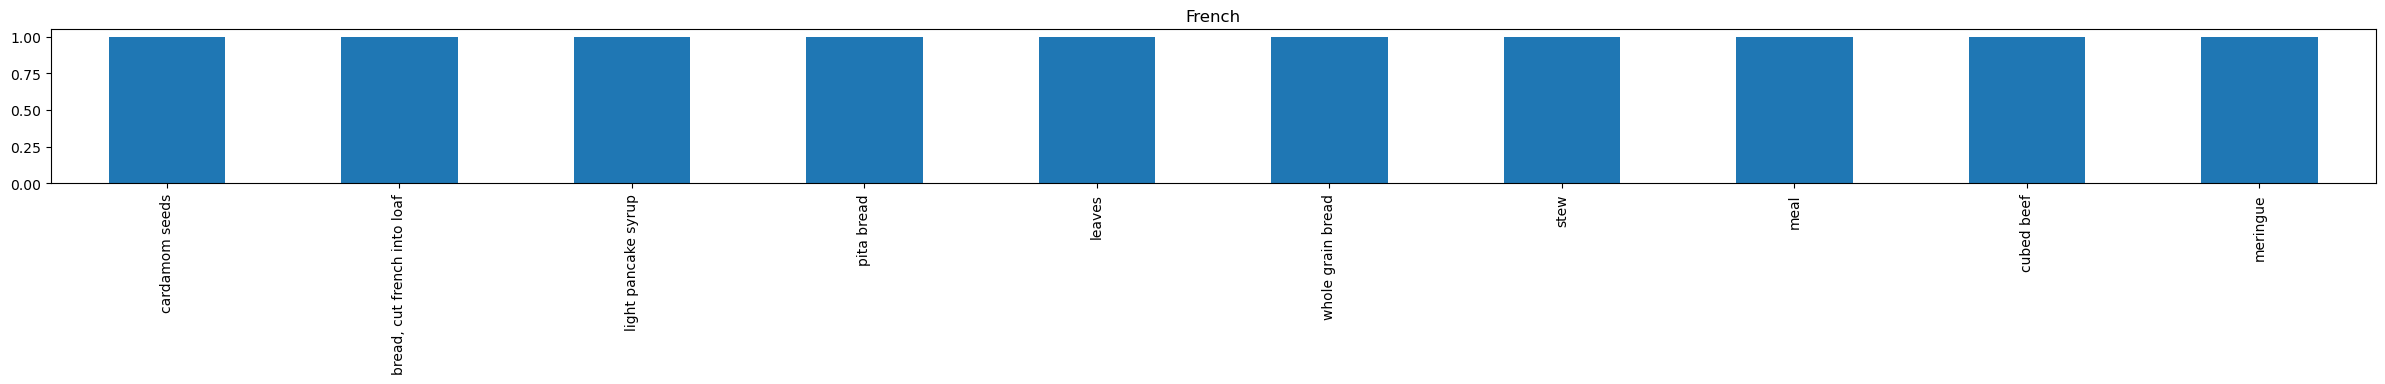

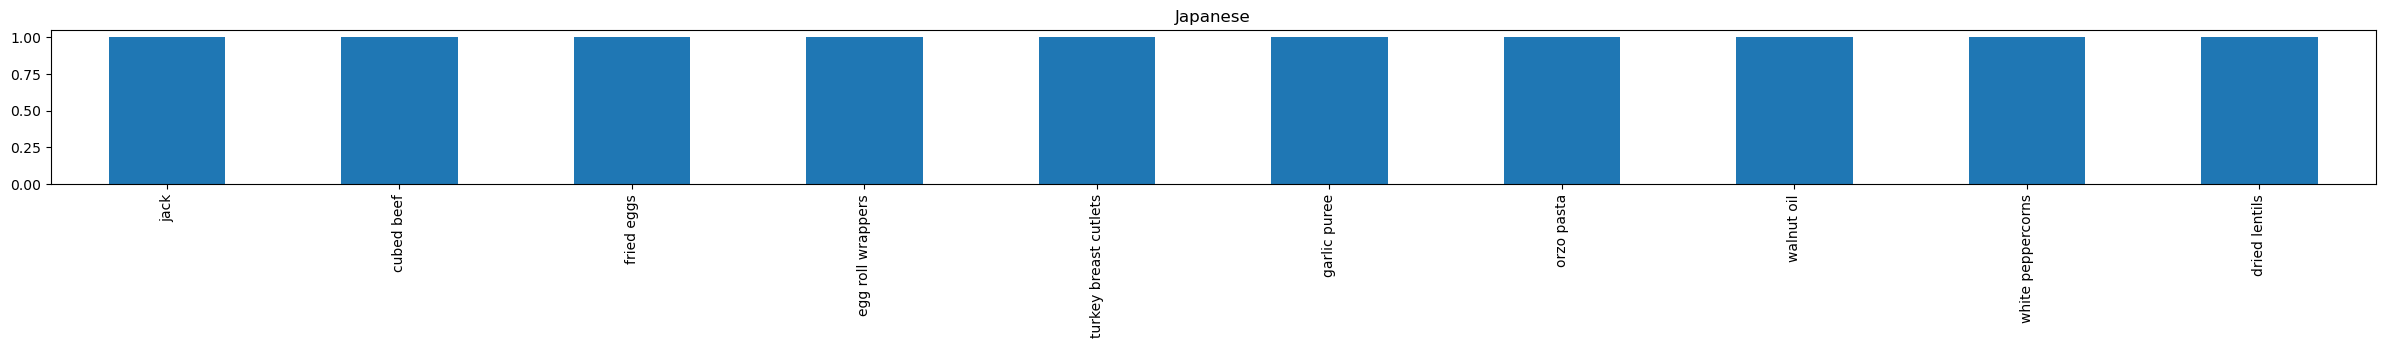

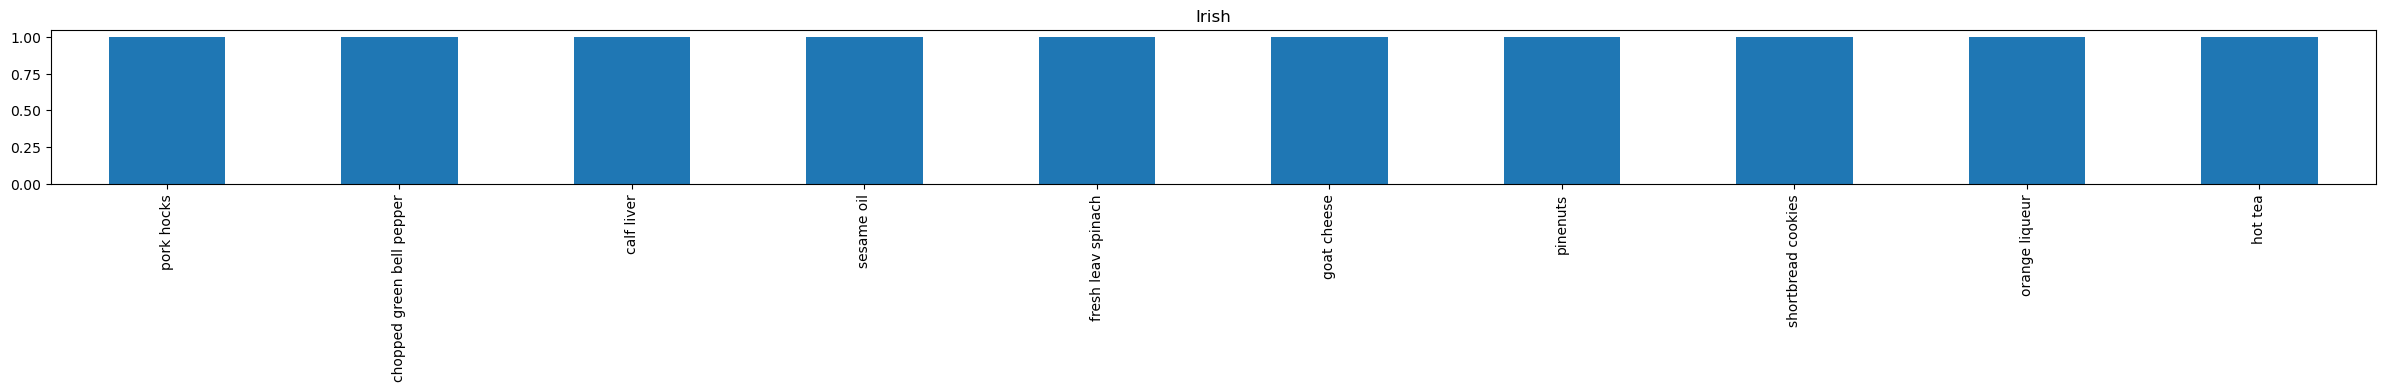

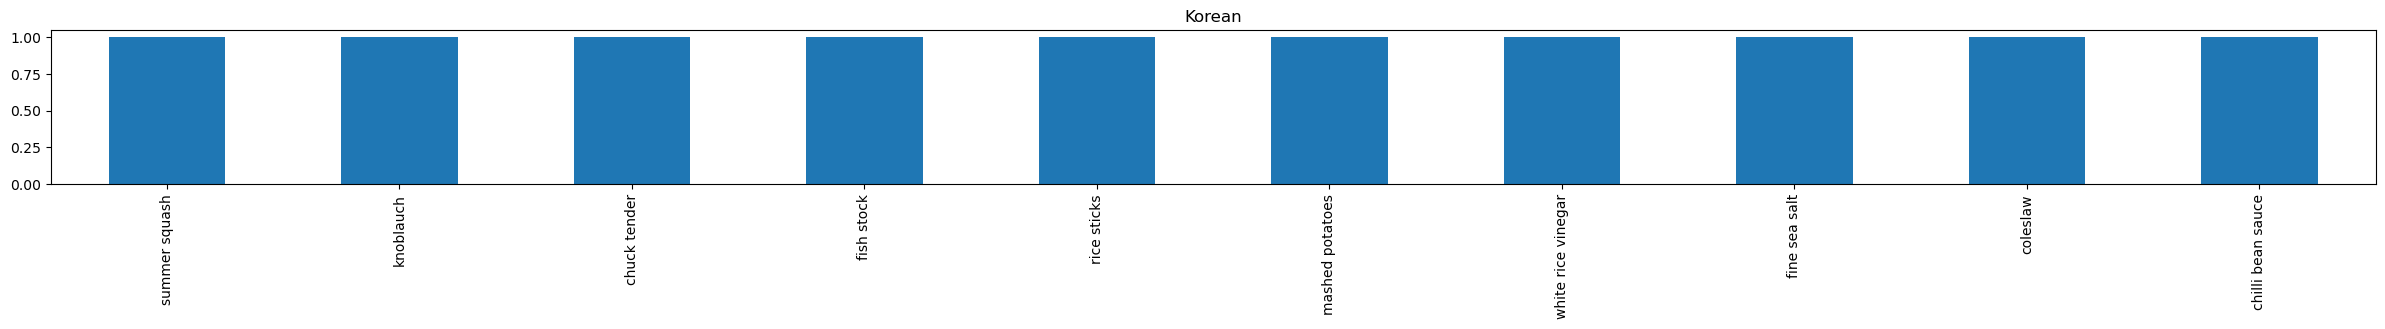

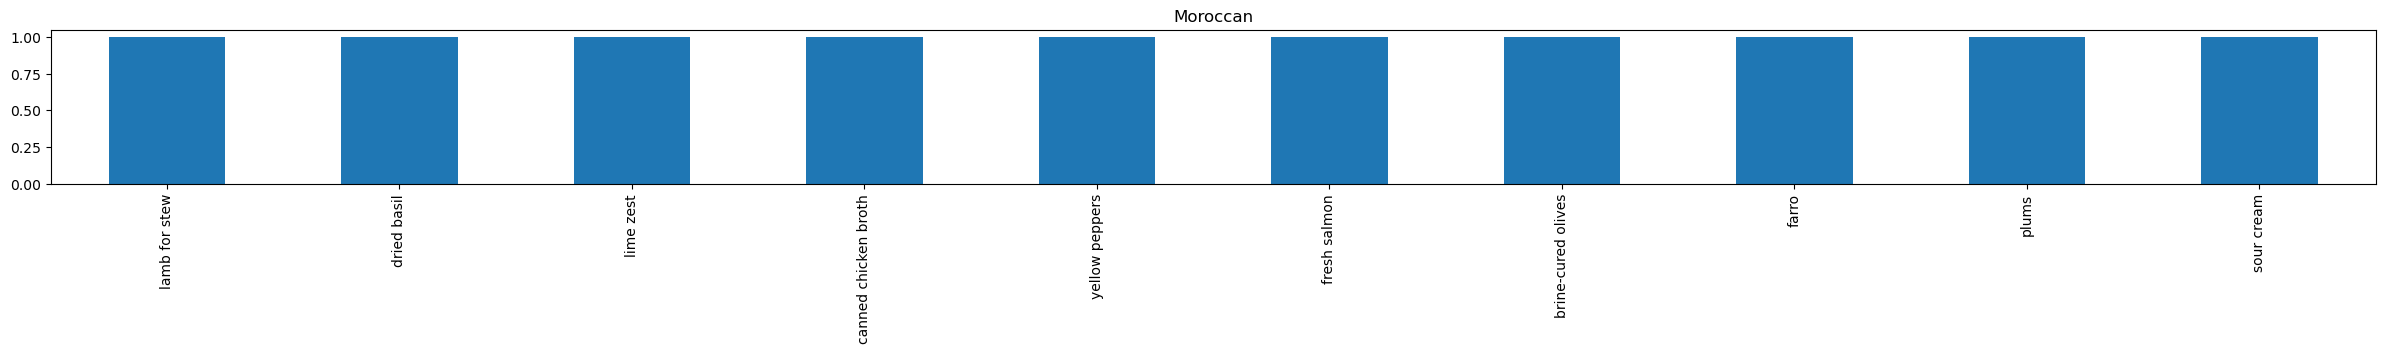

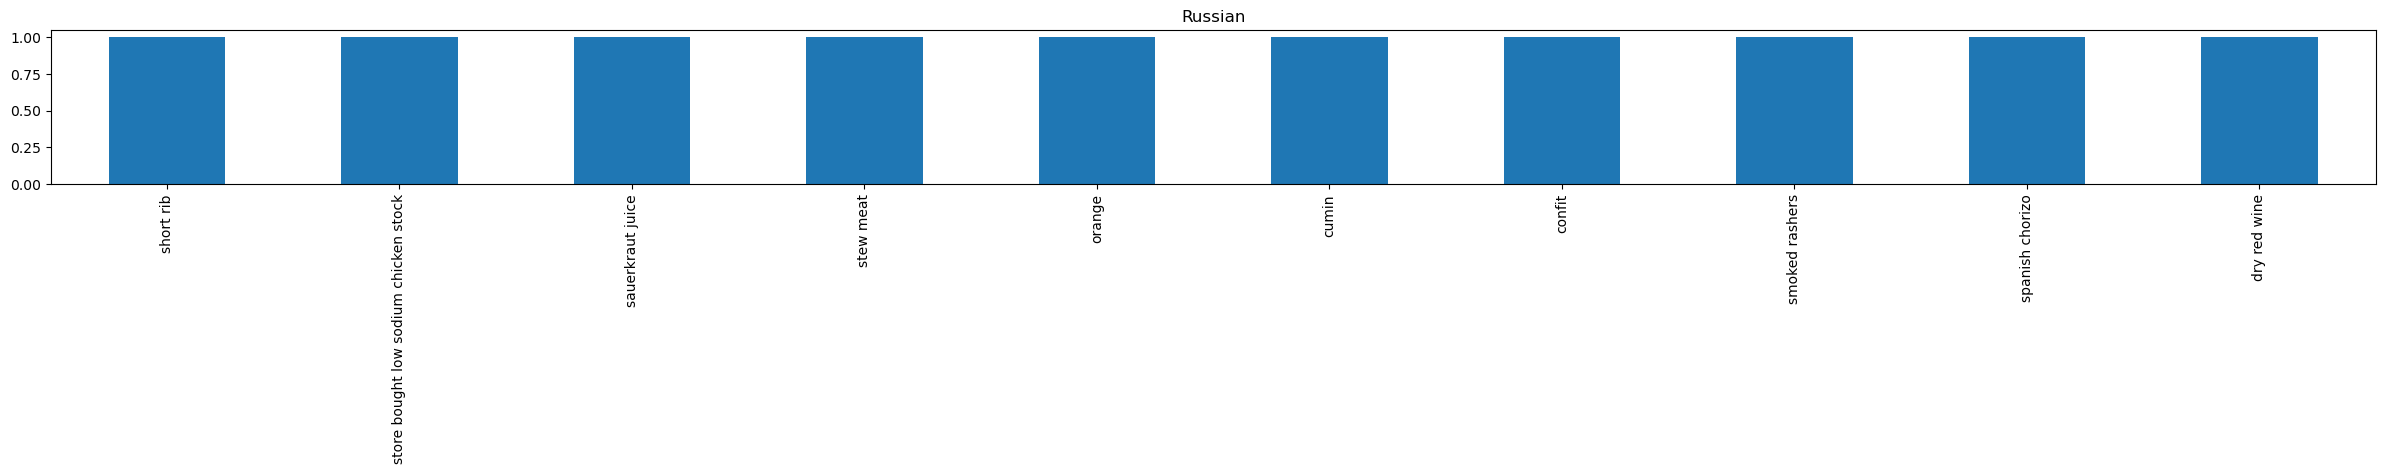

In [5]:
#now we want to show the top 10 least used ingredient
colors = ["r", "g", "b", "m", "c","r", "g", "b", "m", "c","r", "g", "b", "m", "c","r", "g", "b", "m", "c"]
for key in cuisine_dict.keys():
    fig, ax = plt.subplots(figsize=(30,2))
    pd.Series(cuisine_dict[key]).value_counts().tail(10).plot.bar(ax=ax, title=key.capitalize())
    count+=1
    plt.show()

From the above we can see that this information isnt that useful as it shows ingredients of count 1 only

# Example: James dietary preference: no milk 

In [6]:
data_df = pd.read_csv("data_csv.csv")
data_df

,Index,ID,Cuisine,Ingredients
0,0,10259,greek,"romaine lettuce, black olives, grape tomatoes,..."
1,1,25693,southern_us,"plain flour, ground pepper, salt, tomatoes, gr..."
2,2,20130,filipino,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,3,22213,indian,"water, vegetable oil, wheat, salt"
4,4,13162,indian,"black pepper, shallots, cornflour, cayenne pep..."
...,...,...,...,...
39769,39769,29109,irish,"light brown sugar, granulated sugar, butter, w..."
39770,39770,11462,italian,"KRAFT Zesty Italian Dressing, purple onion, br..."
39771,39771,2238,irish,"eggs, citrus fruit, raisins, sourdough starter..."
39772,39772,41882,chinese,"boneless chicken skinless thigh, minced garlic..."


In [7]:
korean_milk_foods = data_df.loc[data_df['Cuisine'] == 'korean']
korean_milk_foods = korean_milk_foods[korean_milk_foods['Ingredients'].str.contains('milk')]
print('The amount of foods containing milk in korean cuisine are '+ str(len(korean_milk_foods)))

The amount of foods containing milk in korean cuisine are 8


In [8]:
print('The food indexes to avoid are:')
for x in korean_milk_foods.Index:
    print(str(x))

The food indexes to avoid are:
8493
9432
13082
13870
28434
32015
36261
38577


In [9]:
from ipywidgets import interact

Ingredient = ['milk', 'sugar', 'egg', 'shrimp', 'peanut'] 
Cuisine = ['greek', 'indian', 'cajun_creole', 'mexican', 'moroccan', 'filipino', 'brazilian', 'russian', 'french', 'jamaican', 'spanish', 'japanese', 'thai', 'irish', 'italian', 'vietnamese', 'chinese', 'korean', 'british', 'southern_us']

@interact(Cuisine=Cuisine, Ingredient=Ingredient)
def count_ingredient_in_cuisine(Cuisine, Ingredient):
    greek_avoid_foods = data_df.loc[data_df['Cuisine'] == Cuisine]
    greek_avoid_foods = greek_avoid_foods[greek_avoid_foods['Ingredients'].str.contains(Ingredient)]
    print(f'The amount of {Ingredient} foods in {Cuisine} cuisine are {len(greek_avoid_foods)}')


interactive(children=(Dropdown(description='Cuisine', options=('greek', 'indian', 'cajun_creole', 'mexican', '…

From the above, we can check that korean cuisines have actually the LEAST number of foods with milk,therefore we can suggest korean cuisine to him. 